## Análisis Exploratorio de Datos
### Análisis del comportamiendo del jugador en videojuegos online 

Importaciones y vista general del DataFrame:

In [127]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [32]:
sys.path.append(os.path.abspath('C:/Users/gserr/TB_Blanca/Apuntes/Sprint_08/EDA/Datasets/src/utils'))

from funciones_eda import *

In [33]:
#Se construye una ruta relativa para acceder a la carpeta donde se encuentran los datos.
ruta_data = os.path.join("..", "data", "online_gaming_behavior_dataset.csv")

#Visualizacion de datos en dataframe.
df_game_behaviour = pd.read_csv(ruta_data)

df_game_behaviour

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


In [34]:
df_game_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [35]:
df_game_behaviour.describe()

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [36]:
#Visualización general de frecuencia de valores por cada columna del DataFrame. 
for columna in df_game_behaviour:
    print(f"Frecuencia de valores en: {df_game_behaviour[columna].value_counts()}")
    print("")

Frecuencia de valores en: PlayerID
49033    1
9000     1
49017    1
49016    1
49015    1
        ..
9006     1
9005     1
9004     1
9003     1
9002     1
Name: count, Length: 40034, dtype: int64

Frecuencia de valores en: Age
31    1228
37    1219
27    1217
40    1202
42    1187
29    1187
43    1180
18    1167
44    1166
32    1163
36    1154
24    1153
35    1151
22    1150
30    1150
17    1149
38    1140
19    1139
16    1138
23    1130
39    1128
21    1128
33    1123
46    1121
20    1113
41    1111
25    1108
28    1108
45    1108
26    1107
49    1106
34    1103
47    1102
15    1101
48    1097
Name: count, dtype: int64

Frecuencia de valores en: Gender
Male      23959
Female    16075
Name: count, dtype: int64

Frecuencia de valores en: Location
USA       16000
Europe    12004
Asia       8095
Other      3935
Name: count, dtype: int64

Frecuencia de valores en: GameGenre
Sports        8048
Action        8039
Strategy      8012
Simulation    7983
RPG           7952
Name: count

In [37]:
df_game_behaviour.nunique()

PlayerID                     40034
Age                             35
Gender                           2
Location                         4
GameGenre                        5
PlayTimeHours                40034
InGamePurchases                  2
GameDifficulty                   3
SessionsPerWeek                 20
AvgSessionDurationMinutes      170
PlayerLevel                     99
AchievementsUnlocked            50
EngagementLevel                  3
dtype: int64

#### Hipótesis:
- Existe relación entre las compras y  el engagement:
    - Los jugadores con mayor engagement tienden a realizar más compras dentro del juego.
    - El tiempo que se invierte en el juego y los logros conseguidos, influyen en las decisiones de compra.
    - Los juegos de RPG tienen mayor porcentaje de compras. 
- 


#### Objetivos:
- Determinar si existe relación entre las variables ***EngagementLevel*** e ***InGamePurchases***
- Determinar si influyen otras variables en la decisión de compra (horas de juego, logros conseguidos, sexo, edad, etc)
- Determinar si existe algún género en el que se realicen más compras y tenga mayor engagement.

#### Tipificación de los datos
##### Cardinalidad:

In [38]:
#Primero hacemos una valoración generalizada de los valores únicos del dataframe:
cardinalidad = df_game_behaviour.nunique()
cardinalidad

PlayerID                     40034
Age                             35
Gender                           2
Location                         4
GameGenre                        5
PlayTimeHours                40034
InGamePurchases                  2
GameDifficulty                   3
SessionsPerWeek                 20
AvgSessionDurationMinutes      170
PlayerLevel                     99
AchievementsUnlocked            50
EngagementLevel                  3
dtype: int64

In [39]:
#Vemos también la cardinalidad en porcentajes para que nos ayude a determinar el umbral para la clasificiación de varibales:
porcentaje_cardinalidad = cardinalidad/len(df_game_behaviour)*100
porcentaje_cardinalidad

PlayerID                     100.000000
Age                            0.087426
Gender                         0.004996
Location                       0.009992
GameGenre                      0.012489
PlayTimeHours                100.000000
InGamePurchases                0.004996
GameDifficulty                 0.007494
SessionsPerWeek                0.049958
AvgSessionDurationMinutes      0.424639
PlayerLevel                    0.247290
AchievementsUnlocked           0.124894
EngagementLevel                0.007494
dtype: float64

In [40]:
#Visualizamos los tipos de datos para añadirlos posteriormente a un dataframe que recoja cardinalidad, porcentaje de cardinalidad y tipo:
tipo = df_game_behaviour.dtypes

df_cardinalidad = pd.DataFrame({"cardinalidad" : cardinalidad,
                                "%_cardinalidad" : porcentaje_cardinalidad,
                                "tipo_dato" : tipo})
df_cardinalidad.reset_index()

,index,cardinalidad,%_cardinalidad,tipo_dato
0,PlayerID,40034,100.000000,int64
1,Age,35,0.087426,int64
2,Gender,2,0.004996,object
3,Location,4,0.009992,object
4,GameGenre,5,0.012489,object
5,PlayTimeHours,40034,100.000000,float64
6,InGamePurchases,2,0.004996,int64
7,GameDifficulty,3,0.007494,object
8,SessionsPerWeek,20,0.049958,int64
9,AvgSessionDurationMinutes,170,0.424639,int64


##### Clasificación de variables:

In [41]:
df_clasificacion = clasificador_variables(df_game_behaviour, 10, 10)
df_clasificacion

,Cardinalidad,%_Cardinalidad,Tipo,Tipo_Variable
PlayerID,40034,100.0,int64,Numérica continua
Age,35,0.087426,int64,Numérica discreta
Gender,2,0.004996,object,Binaria
Location,4,0.009992,object,Categórica
GameGenre,5,0.012489,object,Categórica
PlayTimeHours,40034,100.0,float64,Numérica continua
InGamePurchases,2,0.004996,int64,Binaria
GameDifficulty,3,0.007494,object,Categórica
SessionsPerWeek,20,0.049958,int64,Numérica discreta
AvgSessionDurationMinutes,170,0.424639,int64,Numérica discreta


#### Observaciones de la clasificación:
 - Hay poca variabilidad en los datos. A pesar de que la muestra es grande, la cardinalidad en las variables numéricas nos es muy alta si la comparamos con el total de datos. 
 - Existen variables con una cardinalidad del 100% y que podrían obviarse dentro del estudio (Id de jugador y el tiempo de juego). 
 - ¿Que exista poca variación en los datos indica que los jugadores tienen perfiles muy parecidos?

#### Definición de los datos:

- __Dataset__: online_gaming_behavior_dataset.csv
    - Fuente: Rabie El Kharoua. (2024). 🎮 Predict Online Gaming Behavior Dataset [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/8742674
- __Descripción__: Datos demográficos y métricas sobre una muestra que recoge el comportamiento del jugador en juegos online. 
- __Periodo__: 2024 

Columna/Variable | Descripción	| Tipo_de_Variable	| Importancia Inicial	| Nota
---------------- | ------------ | --------------	| ----------------------| ------
PlayerID         | Identificación del jugador | Numérica Continua | - | 
Age         | Edad del jugador | Numérica Discreta | 2 | 
Gender       | Sexo del jugador | Binaria | 2 | 
Location         | Zona geográfica del jugador | Categórica Nominal| 3 | 
Genre        | Género del juego | Categórica Nominal | 1 | 
PlayTimeHours | Promedio de tiempo jugado por sesión |Numérica Continua| 1 | En horas 
InGamePurchases | Compras realizadas en el juego | Binaria | 0 | 0 = No, 1 = Sí
GameDifficulty | Nivel de dificultad del juego |Categórical Ordinal| 3 | Facil, medio, difícil
SessionsPerWeek | Número de sesiones de juego por semana | Numérica Discreta | 2 |
AvgSessionDurationMinutes | Duración media por sesión | Numérica Discreta | 3 | En minutos
PlayerLevel | Nivel del jugador en el juego | Numérica Discreta| 3 | 
AchievementsUnlocked  | Numero de logros desbloqueados en el juego |Numérica Discreta | 1 | Suelen ser premios/medallas/distinciones por misiones completadas
EngagementLevel | Nivel de engagement del jugador | Categórica Ordinal | 0 | Bajo, medio, alto

#### Tendencia Central

##### Media
Variables numéricas

In [42]:
df_game_behaviour.describe().loc["mean"]

PlayerID                     29016.500000
Age                             31.992531
PlayTimeHours                   12.024365
InGamePurchases                  0.200854
SessionsPerWeek                  9.471774
AvgSessionDurationMinutes       94.792252
PlayerLevel                     49.655568
AchievementsUnlocked            24.526477
Name: mean, dtype: float64

Observaciones:
- La media de edad de los jugadores de la muestra es de 32 años
- El tiempo invertido de juego es elevado; 12h de media por sesión, 9 sesiones a la semana 
- La media en compras es muy baja.


##### Mediana
Comprobaciones y comparación con la media

In [43]:
df_game_behaviour.describe().loc["50%"]

PlayerID                     29016.500000
Age                             32.000000
PlayTimeHours                   12.008002
InGamePurchases                  0.000000
SessionsPerWeek                  9.000000
AvgSessionDurationMinutes       95.000000
PlayerLevel                     49.000000
AchievementsUnlocked            25.000000
Name: 50%, dtype: float64

Observaciones:
- Tanto la media como la mediana tienen valores similares.
- Parece que no haya outliers o datos muy dispares.
- Comprobamos los valores máximos:


In [44]:
df_game_behaviour.describe().loc["max"]

PlayerID                     49033.000000
Age                             49.000000
PlayTimeHours                   23.999592
InGamePurchases                  1.000000
SessionsPerWeek                 19.000000
AvgSessionDurationMinutes      179.000000
PlayerLevel                     99.000000
AchievementsUnlocked            49.000000
Name: max, dtype: float64

##### Moda
Variables categóricas

In [45]:
# Pasamos las variables categóricas a una lista.
categoricas = [ "Gender",
                "Location",
                "GameGenre",
                "GameDifficulty",
                "EngagementLevel",
]
                
df_game_behaviour[categoricas].mode().T #Obtenemos la moda de cada categórica y transponemos el dataframe para una mejor visualización

,0
Gender,Male
Location,USA
GameGenre,Sports
GameDifficulty,Easy
EngagementLevel,Medium


Observaciones:
- La mayoría de jugadores son hombres de Norteamérica.
- El género más popular es el de deportes, aunque por muy poca diferencia con el resto.
- El nivel de dificultad más jugado es en modo fácil.
- El nivel de engagement es medio. 

### Análisis Univariante

#### Frecuencias

##### Absoluta

In [46]:
#En este caso vamos a incluir nuestra variable directoria InGamePurchase como categórica para ver su frecuencia:
categoricas_2 =  [ "Gender",
                "Location",
                "GameGenre",
                "GameDifficulty",
                "EngagementLevel",
                "InGamePurchases"
]

In [47]:
#Vemos los valores únicos de cada categórica:
for categoria in categoricas_2:
    print(f"Valores únicos en {categoria}")
    print(df_game_behaviour[categoria].value_counts())
    print("")

Valores únicos en Gender
Gender
Male      23959
Female    16075
Name: count, dtype: int64

Valores únicos en Location
Location
USA       16000
Europe    12004
Asia       8095
Other      3935
Name: count, dtype: int64

Valores únicos en GameGenre
GameGenre
Sports        8048
Action        8039
Strategy      8012
Simulation    7983
RPG           7952
Name: count, dtype: int64

Valores únicos en GameDifficulty
GameDifficulty
Easy      20015
Medium    12011
Hard       8008
Name: count, dtype: int64

Valores únicos en EngagementLevel
EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64

Valores únicos en InGamePurchases
InGamePurchases
0    31993
1     8041
Name: count, dtype: int64



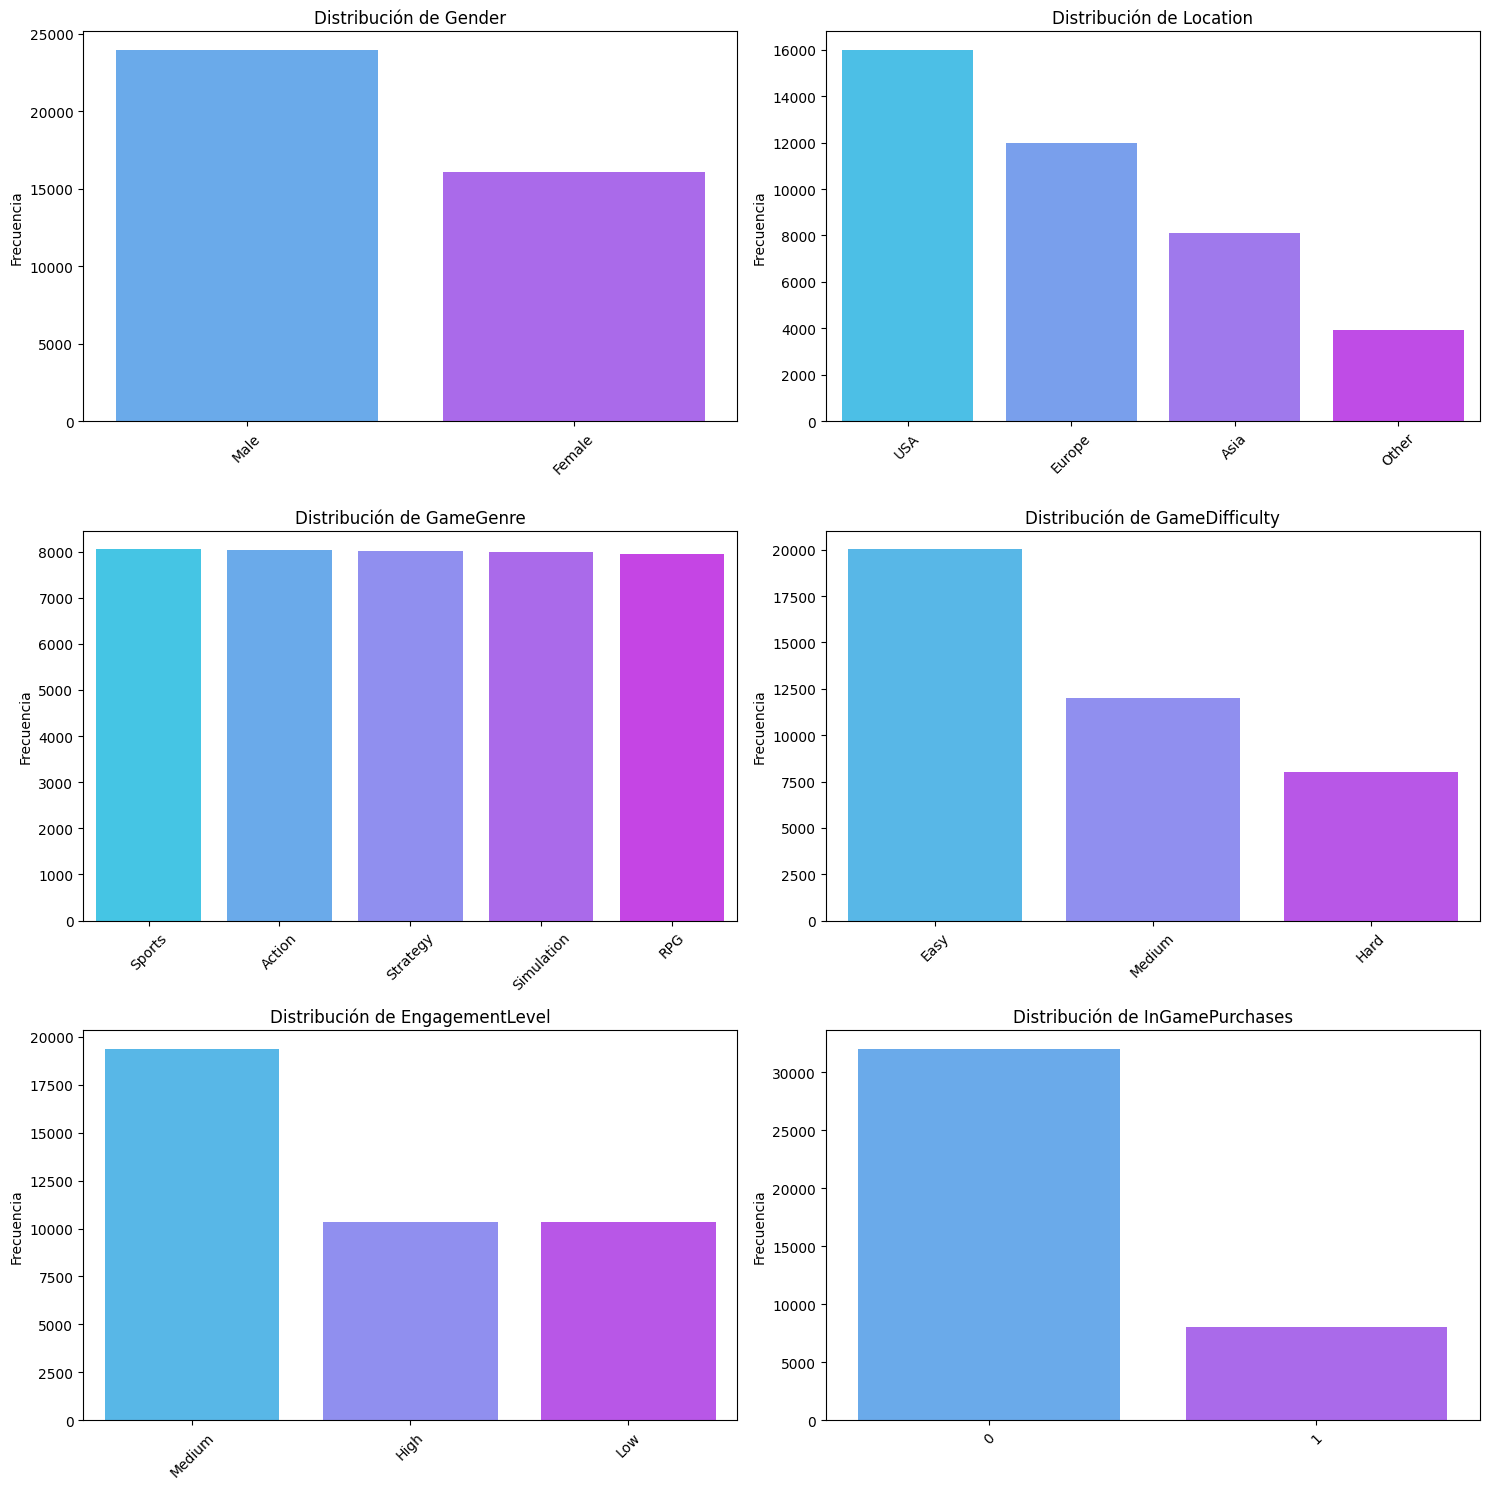

In [48]:
#Vemos representación gráfica:
pinta_distribucion_categoricas(df_game_behaviour, categoricas_2)

##### Relativa

In [49]:
#Vemos los valores únicos de cada categórica:
for categoria in categoricas_2:
    print(f"Valores únicos en {categoria}")
    print(df_game_behaviour[categoria].value_counts()/len(df_game_behaviour)*100)
    print("")

Valores únicos en Gender
Gender
Male      59.84663
Female    40.15337
Name: count, dtype: float64

Valores únicos en Location
Location
USA       39.966029
Europe    29.984513
Asia      20.220313
Other      9.829145
Name: count, dtype: float64

Valores únicos en GameGenre
GameGenre
Sports        20.102913
Action        20.080432
Strategy      20.012989
Simulation    19.940551
RPG           19.863116
Name: count, dtype: float64

Valores únicos en GameDifficulty
GameDifficulty
Easy      49.995004
Medium    30.001998
Hard      20.002997
Name: count, dtype: float64

Valores únicos en EngagementLevel
EngagementLevel
Medium    48.393865
High      25.818055
Low       25.788080
Name: count, dtype: float64

Valores únicos en InGamePurchases
InGamePurchases
0    79.914573
1    20.085427
Name: count, dtype: float64



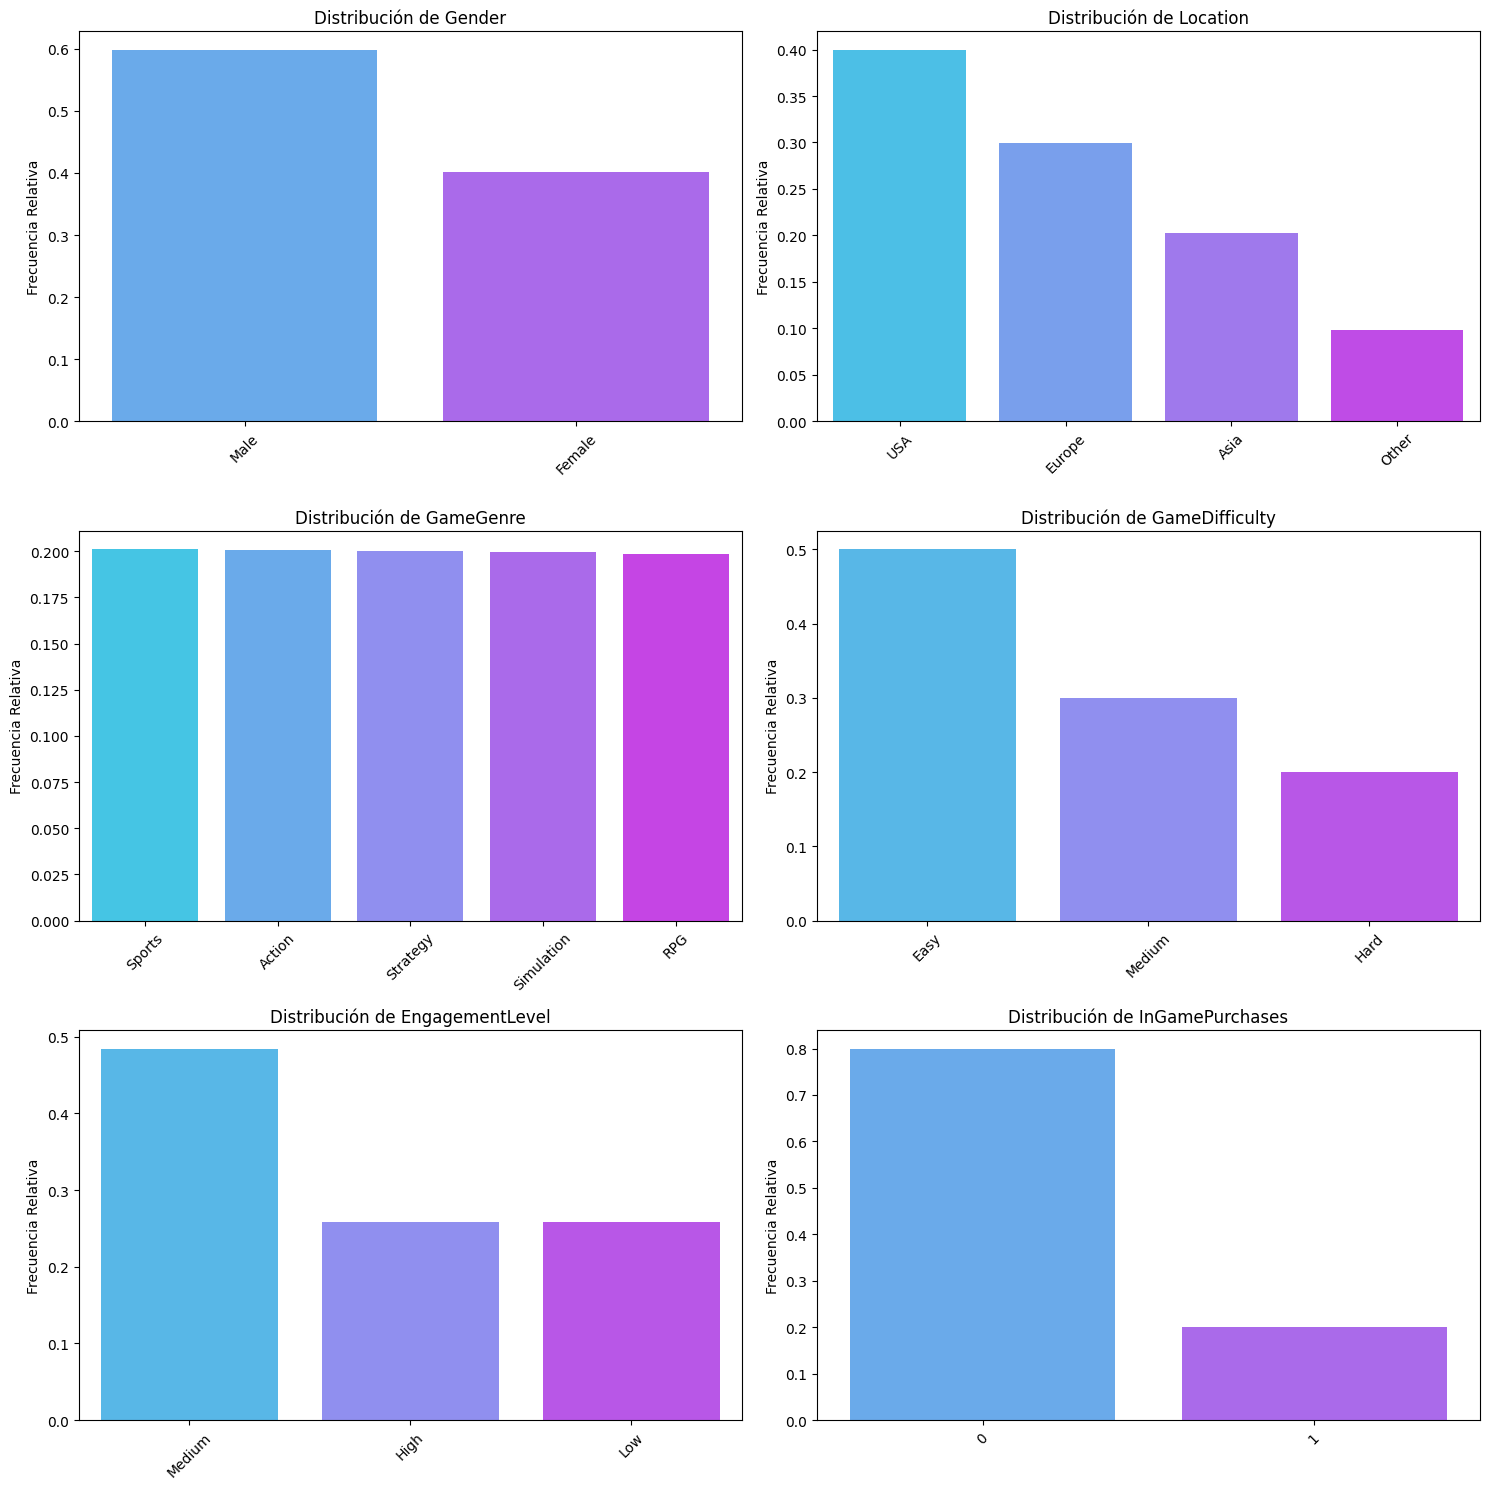

In [50]:
#Vemos representación gráfica:
pinta_distribucion_categoricas(df_game_behaviour, categoricas_2, relativa=True)

Observaciones y preguntas:
- No existe una diferencia significativa de popularidad entre los géneros de juego. ¿Qué genero es el que tiene mayor nivel de engagement?¿Y en el que más compras se realizan? 
- El nivel de engagement que predomina es medio representando casi el 50% de la muestra. Los niveles de engagement más alto y más bajo representan el otro 50% de la muestra. ¿Qué otras variables influyen? ¿Influyen los logros conseguidos? ¿Se consiguen más logros en un niveles más fáciles?
- Las compras dentro del juego no son significativas. ¿Existe un perfil de compra específico? ¿Influyen otras variables?


#### Medidas de posición y rangos

##### Cálculo del IQR y Rango de cada variable numérica: 

In [51]:
# Pasamos las variables numéricas a una lista.
# No se tiene en cuenta Player ID ya que puede tratarse como index. Por otro lado, tampoco contamos con InGamePurchases ya que se ha considerado como categórica. 
numericas = [ "Age",
             "PlayTimeHours", 
             "SessionsPerWeek",
             "AvgSessionDurationMinutes", 
             "PlayerLevel",
             "AchievementsUnlocked"          
]

# Recorremos la lista para mostrar por pantalla el IQR, mediana y rango para poder compararlos: 
for variable in numericas:
    print(f"Para {variable}:")
    print(f"IQR: {get_IQR(df_game_behaviour, variable)}")
    print(f"Mediana: {df_game_behaviour[variable].describe().loc["50%"]}")
    print(f"Rango:{df_game_behaviour[variable].describe().loc["max"] - df_game_behaviour[variable].describe().loc["min"]}")
    print("")

Para Age:
IQR: 18.0
Mediana: 32.0
Rango:34.0

Para PlayTimeHours:
IQR: 11.89633063054563
Mediana: 12.00800215801307
Rango:23.999476946960538

Para SessionsPerWeek:
IQR: 10.0
Mediana: 9.0
Rango:19.0

Para AvgSessionDurationMinutes:
IQR: 85.0
Mediana: 95.0
Rango:169.0

Para PlayerLevel:
IQR: 49.0
Mediana: 49.0
Rango:98.0

Para AchievementsUnlocked:
IQR: 25.0
Mediana: 25.0
Rango:49.0



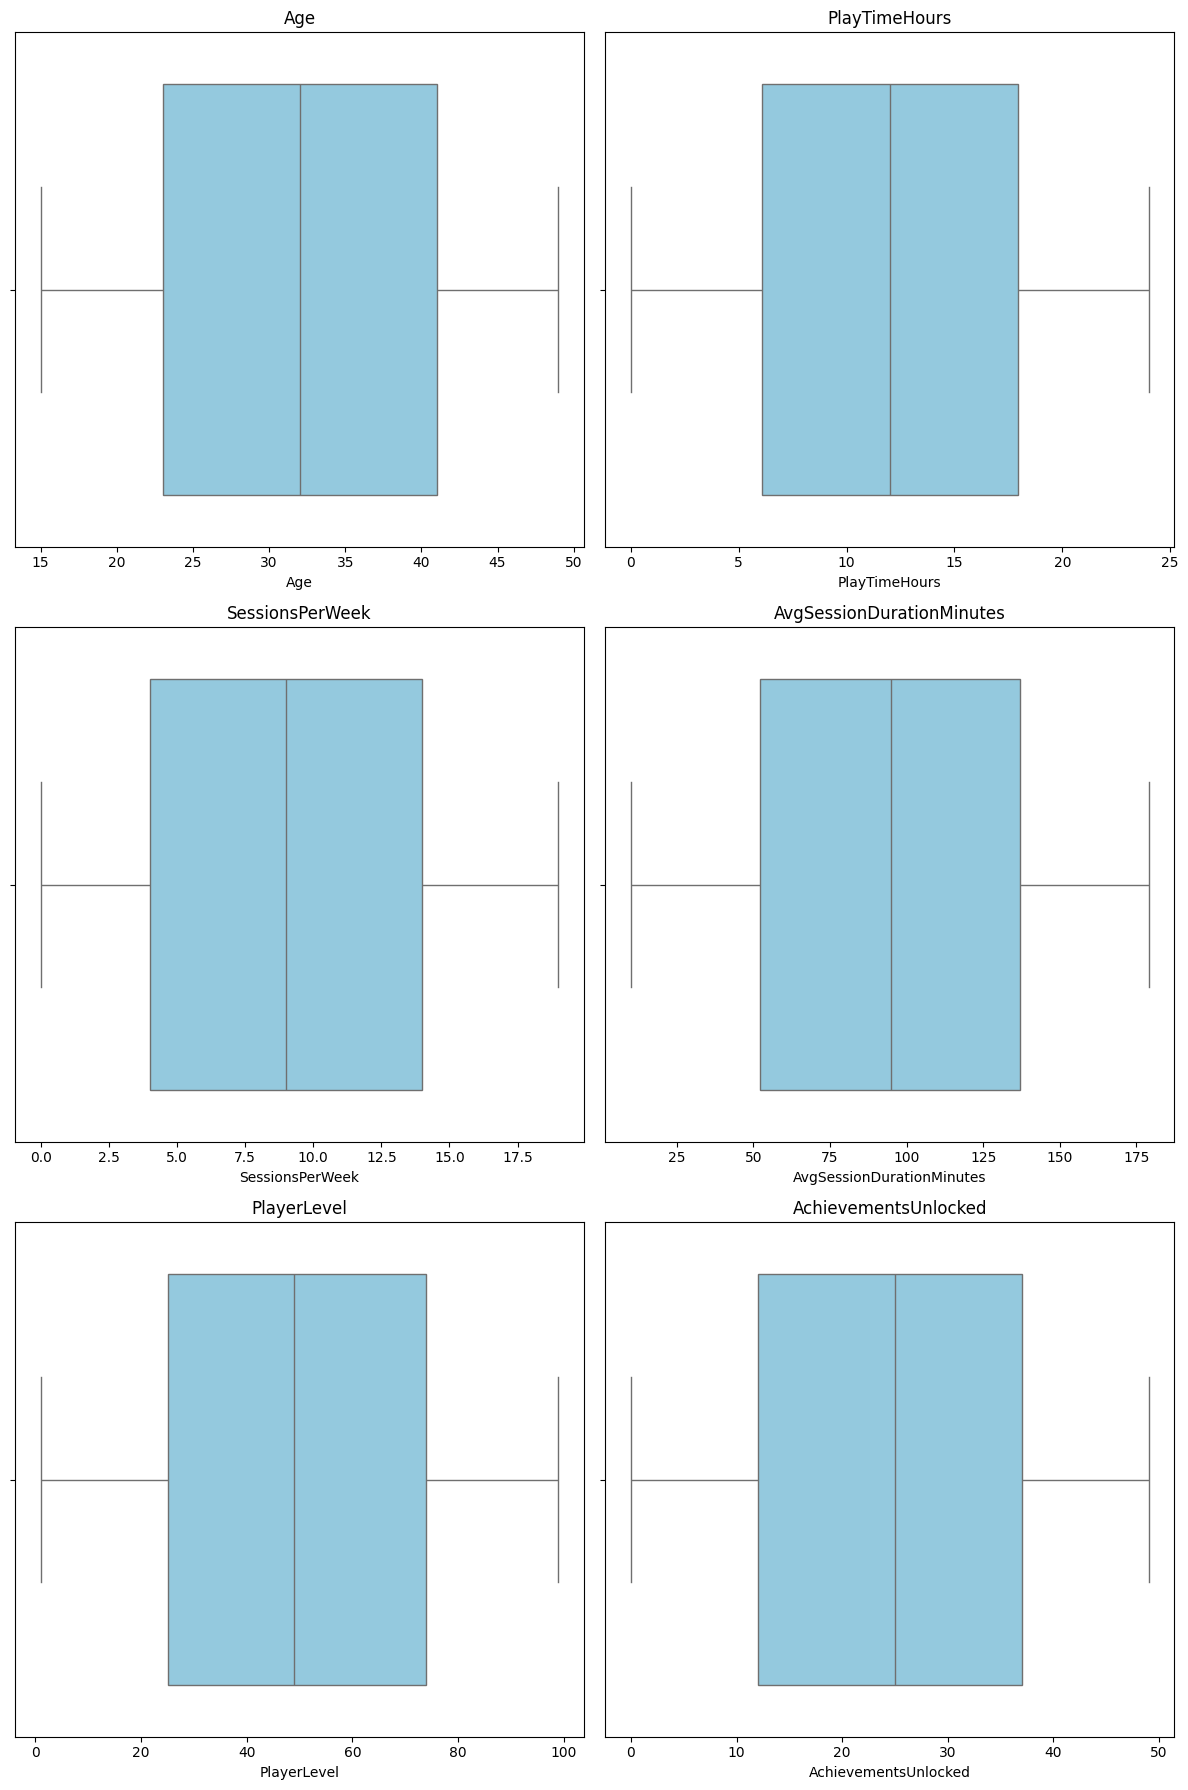

In [52]:
plot_multiple_boxplots(df_game_behaviour, numericas)

Observaciones:
- Las variables numéricas son homogéneas, no hay outliers. 
- Como se observaba anteriormente, ¿quiere decir que el comportamiento de juego es similar entre los usuarios?


#### Medidas de dispersión

In [53]:
variabilidad(df_game_behaviour[numericas])

,std,mean,CV
Age,10.043227,31.992531,0.313924
PlayTimeHours,6.914638,12.024365,0.575052
SessionsPerWeek,5.763667,9.471774,0.608510
AvgSessionDurationMinutes,49.011375,94.792252,0.517040
PlayerLevel,28.588379,49.655568,0.575734
AchievementsUnlocked,14.430726,24.526477,0.588373


#### Distribución
##### Histograma y KDE

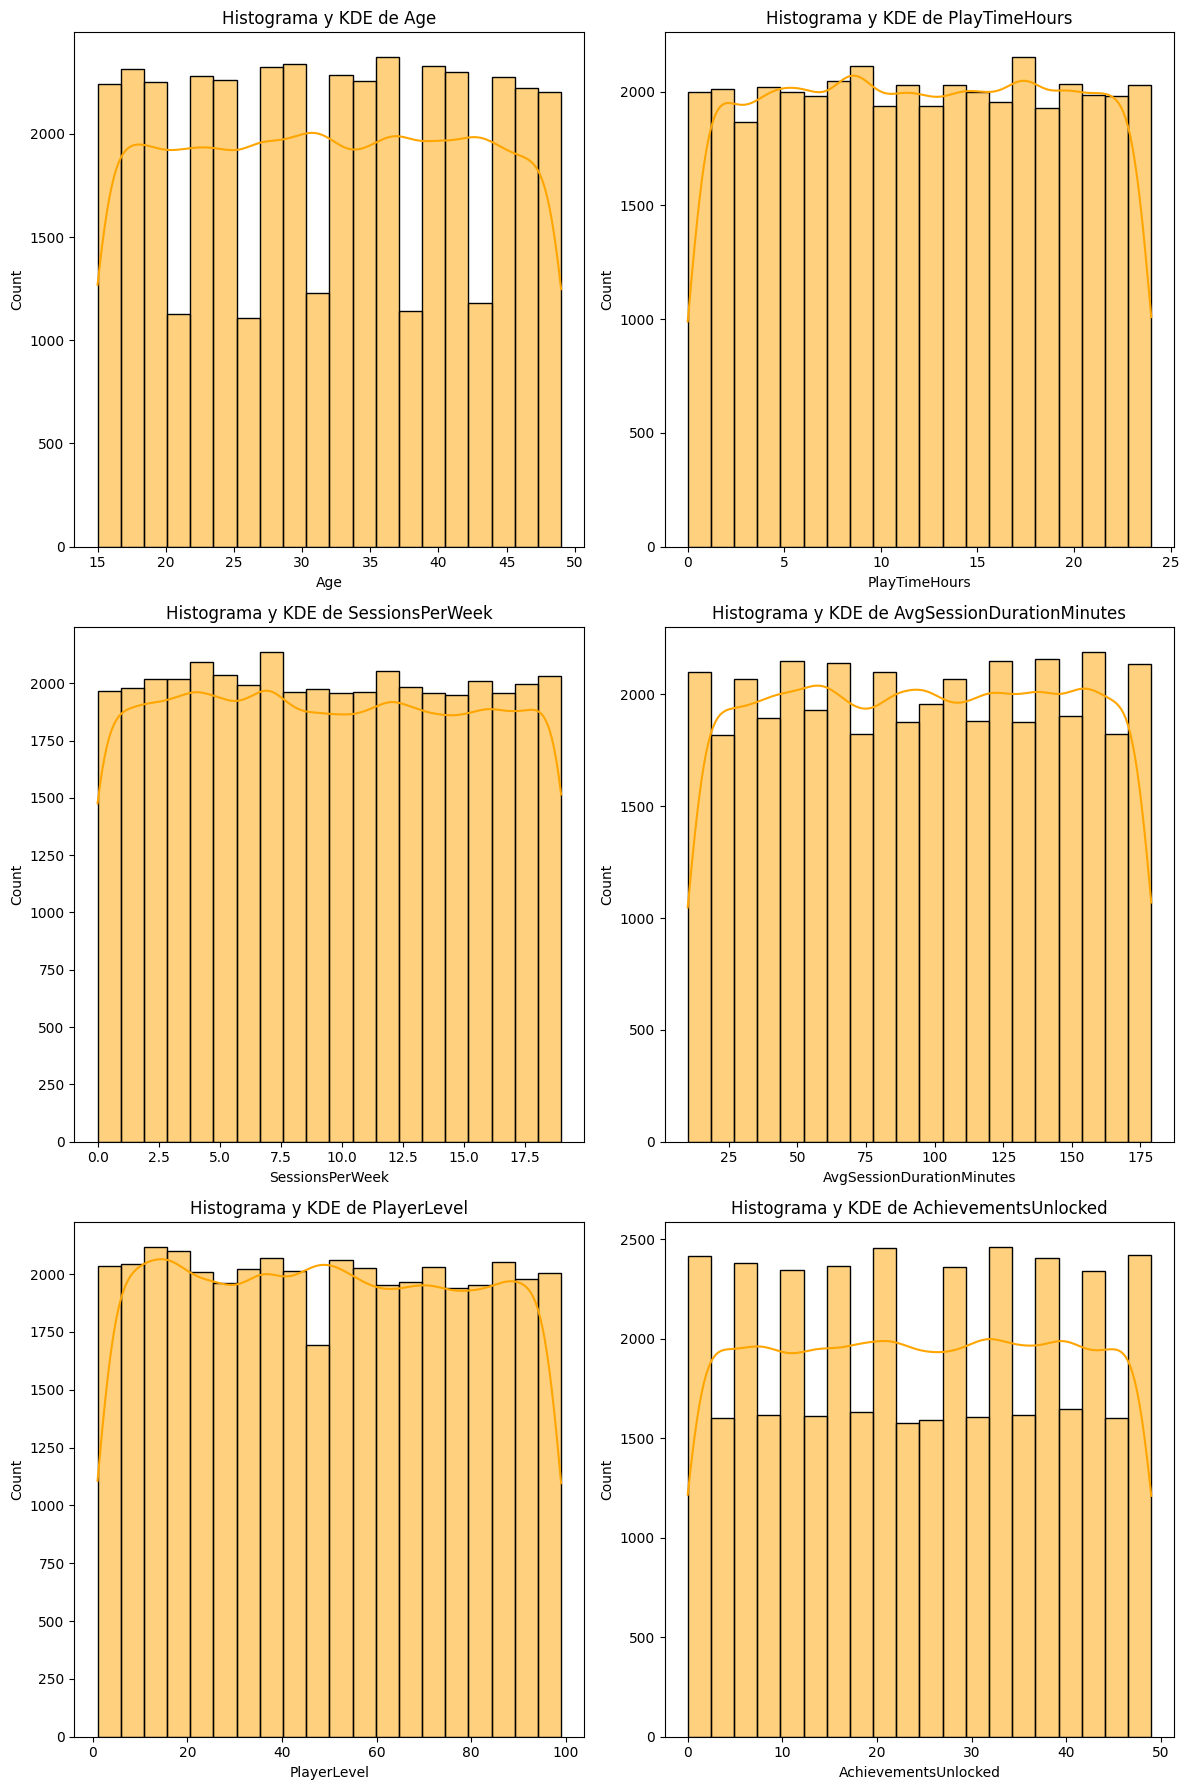

In [54]:
#Hacemos una vista general de todas la variables numéricas:
plot_histo_den(df_game_behaviour, numericas)

#### Revisión de Outliers
Apriori, no se observan outliers en la muestra.

(6, 2)


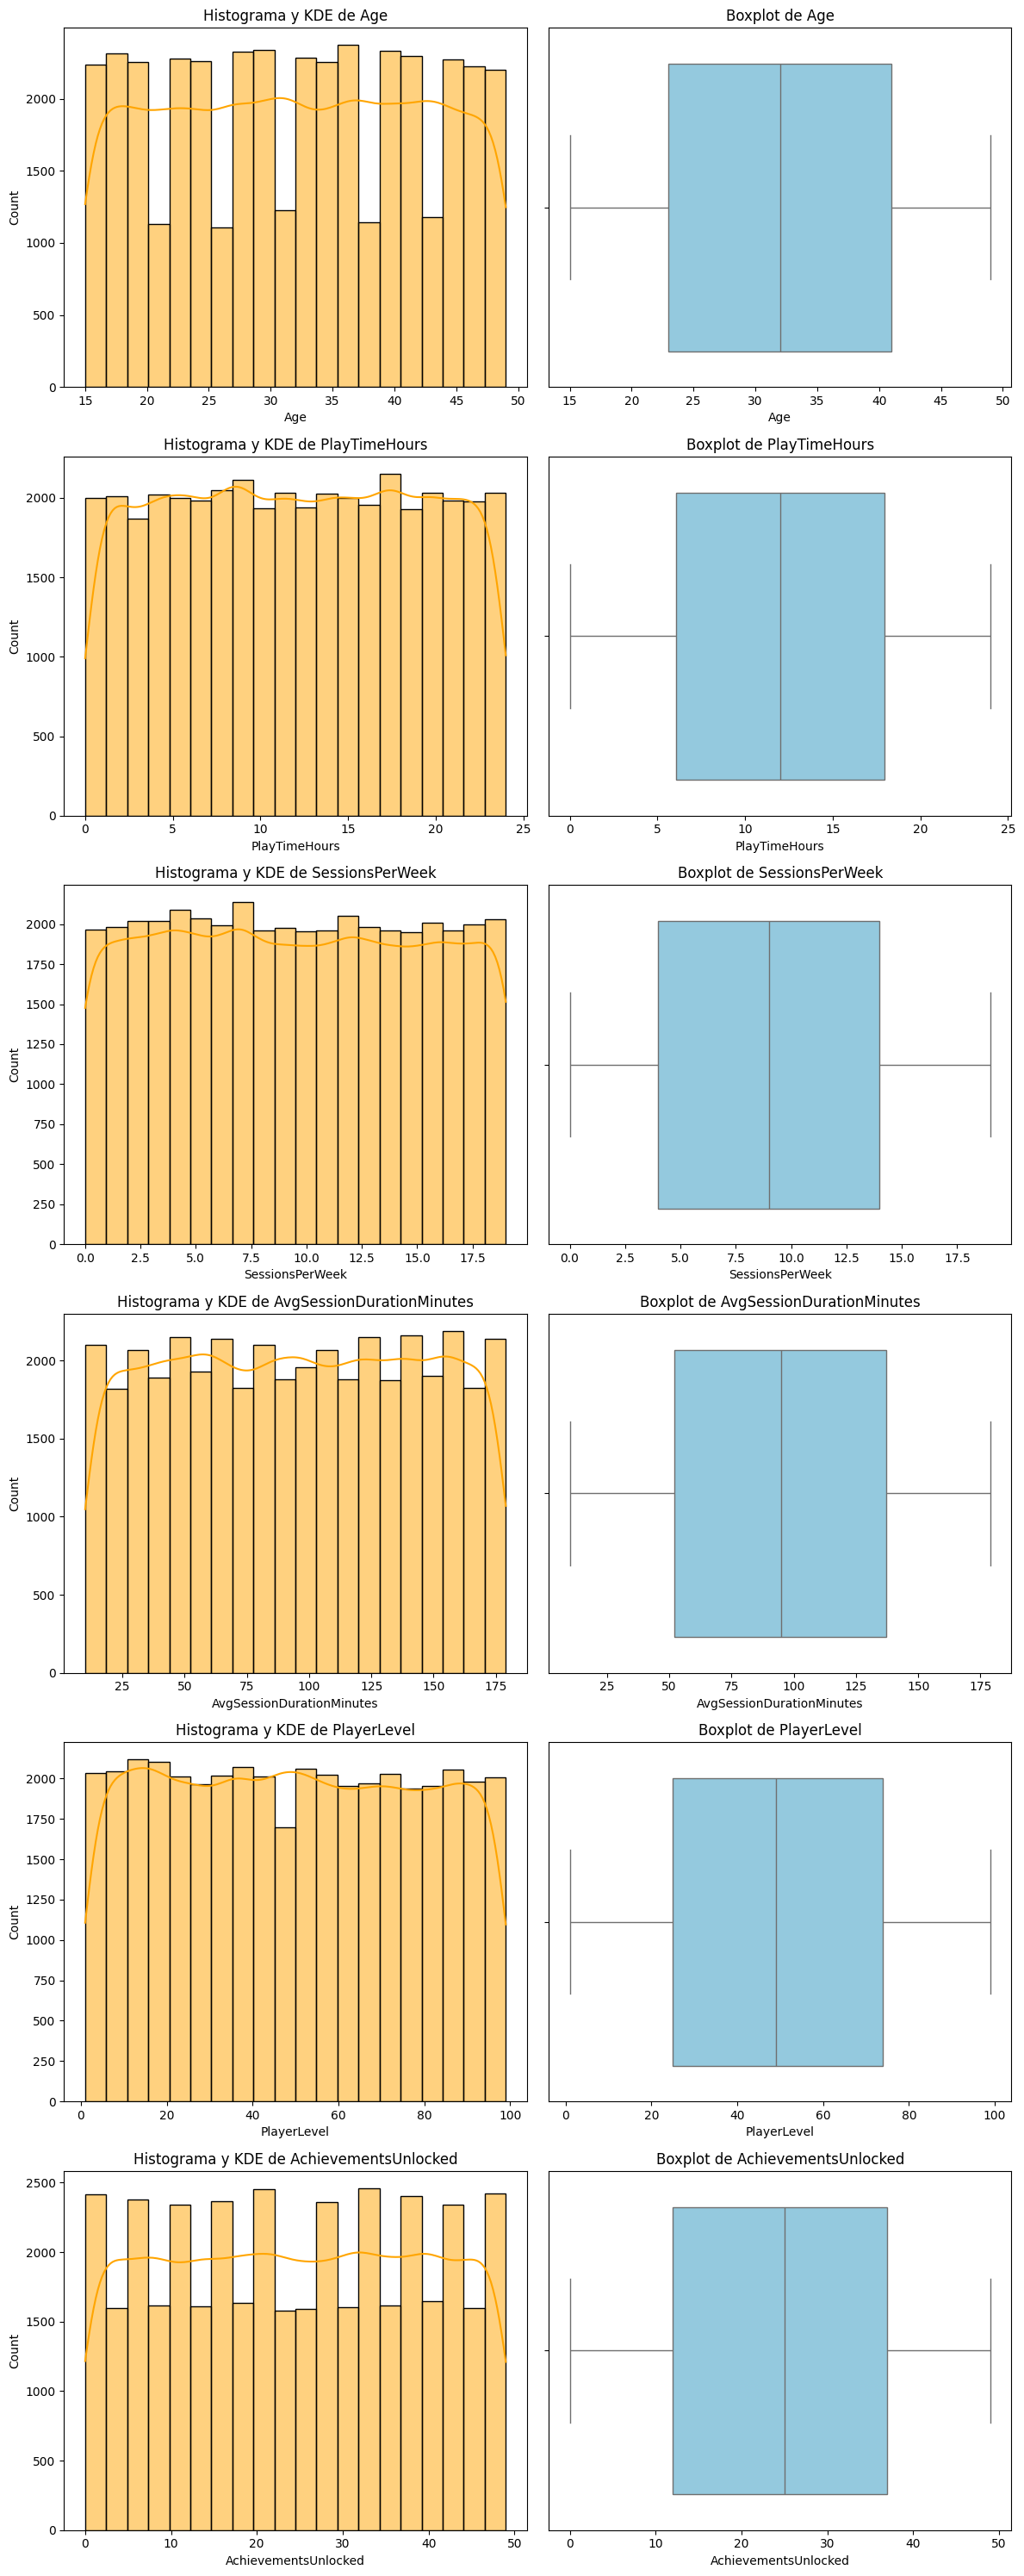

In [55]:
plot_combined_graphs(df_game_behaviour, numericas)

#### Análisis Bivariante
##### Categóricas

##### IngamePurchases vs EngagementLevel:

##### Absoluta

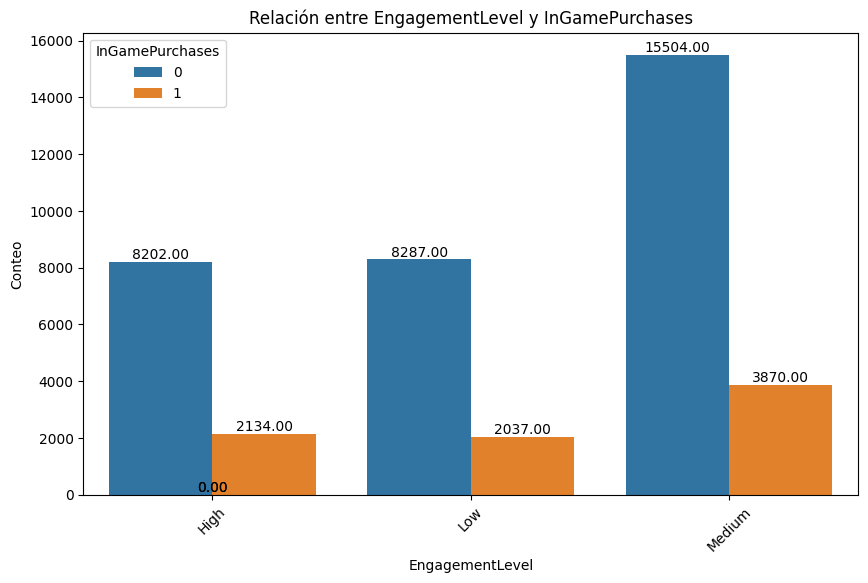

In [57]:
plot_categorical_relationship_fin(df_game_behaviour, "EngagementLevel", "InGamePurchases", relative_freq=False, show_values=True, size_group = 5)

##### Relativa

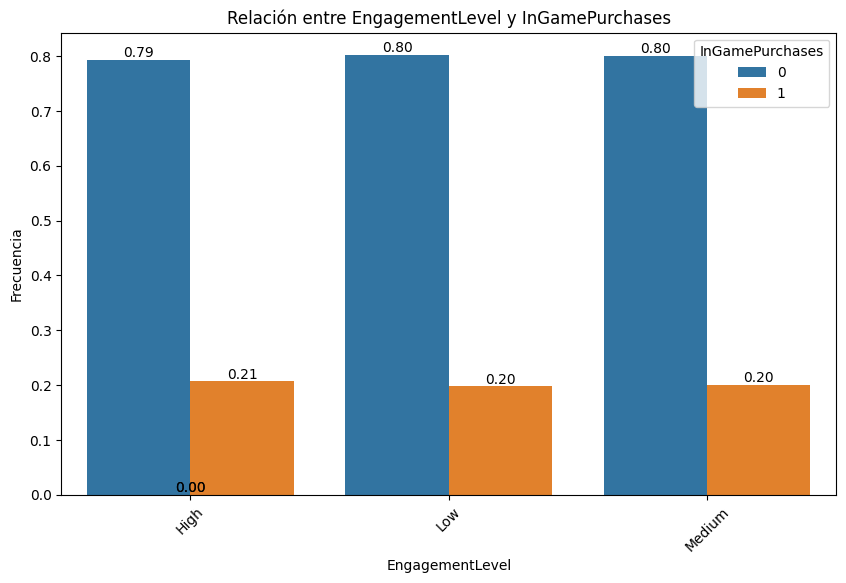

In [58]:
plot_categorical_relationship_fin(df_game_behaviour, "EngagementLevel", "InGamePurchases",  relative_freq=True, show_values=True, size_group = 5)

#### Compras vs Gender

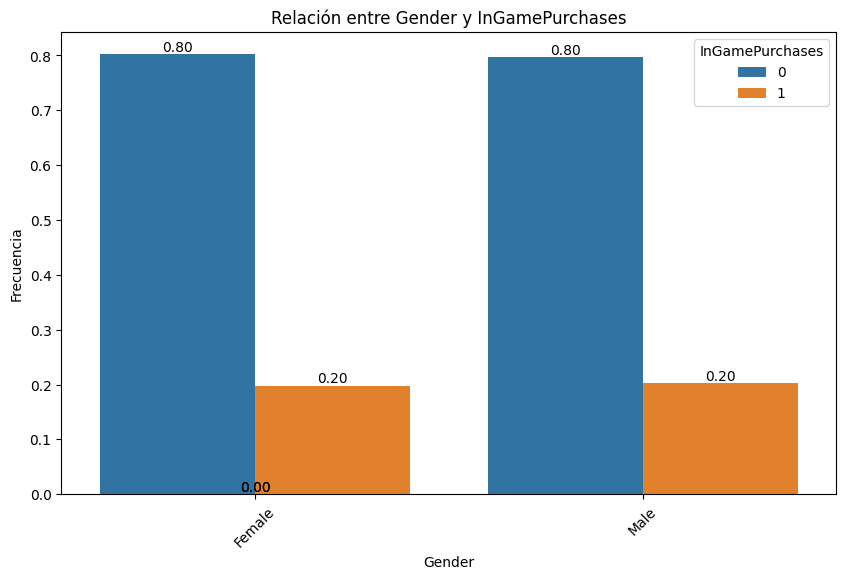

In [59]:
plot_categorical_relationship_fin(df_game_behaviour, "Gender", "InGamePurchases",  relative_freq=True, show_values=True, size_group = 5)

#### Compras vs Location

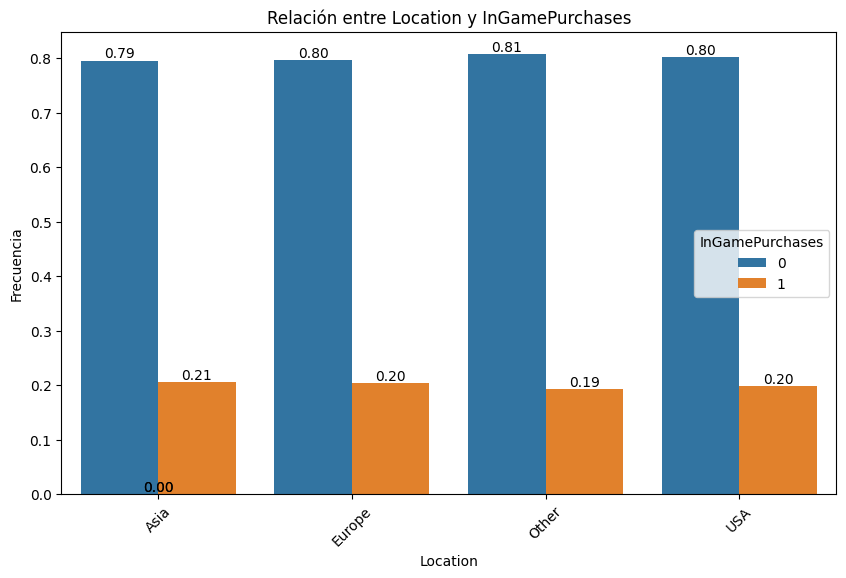

In [60]:
plot_categorical_relationship_fin(df_game_behaviour, "Location", "InGamePurchases",  relative_freq=True, show_values=True, size_group = 5)

#### Compras vs Género de Juego

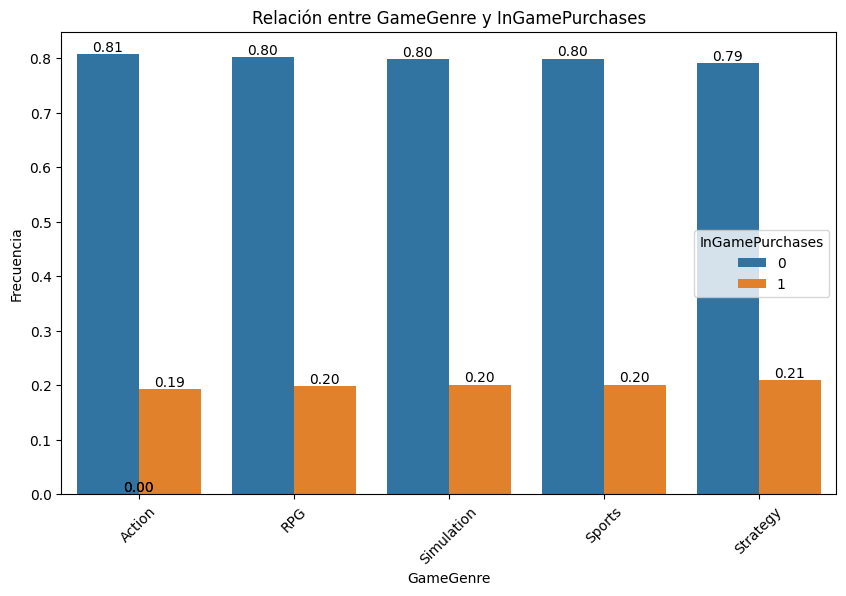

In [61]:
plot_categorical_relationship_fin(df_game_behaviour, "GameGenre", "InGamePurchases",  relative_freq=True, show_values=True, size_group = 5)

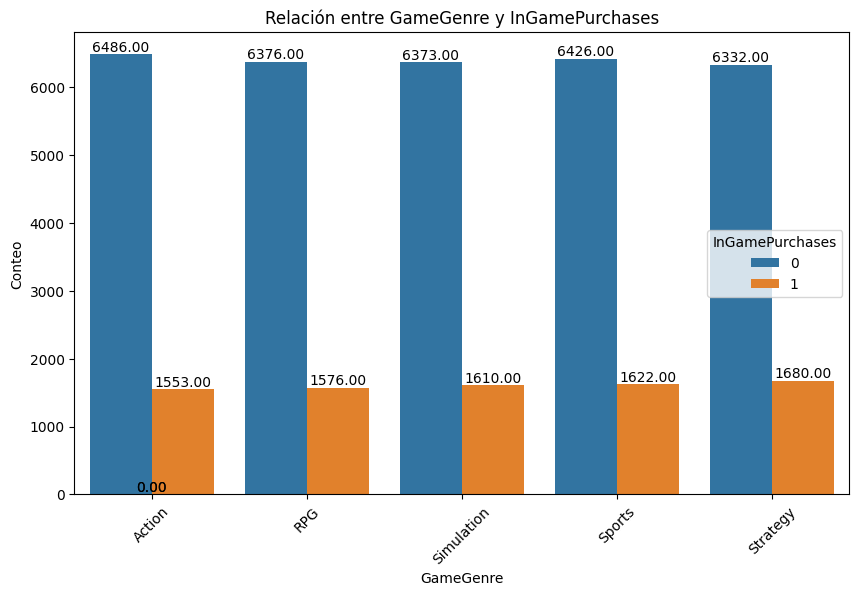

In [62]:
plot_categorical_relationship_fin(df_game_behaviour, "GameGenre", "InGamePurchases",  relative_freq=False, show_values=True, size_group = 5)

#### Compras vs Dificultad

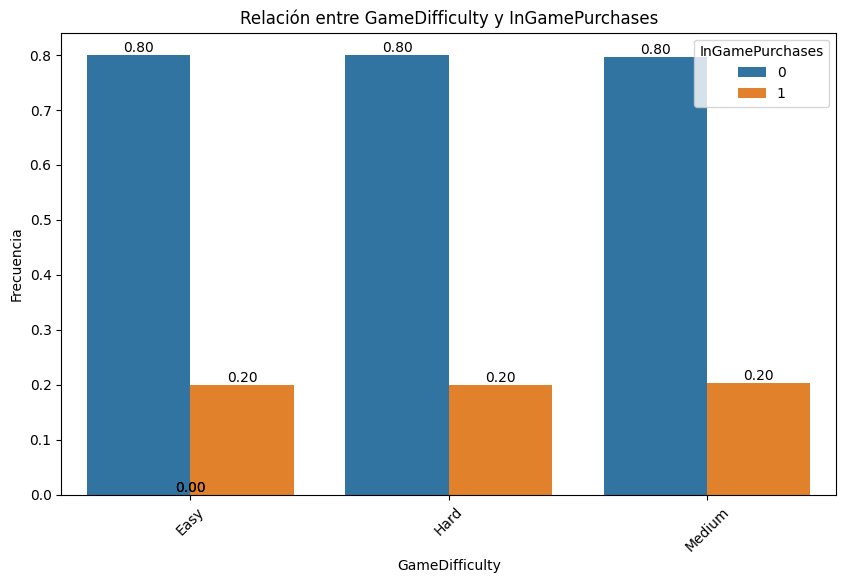

In [63]:
plot_categorical_relationship_fin(df_game_behaviour, "GameDifficulty", "InGamePurchases",  relative_freq=True, show_values=True, size_group = 5)

#### Observaciones:
- Como hemos visto al comparar las variables que hemos marcado como directorias, tampoco el resto de variables categóricas influye sobre las compras. 
- Esto puede ser interesante a la hora de plantear estrategias de marketing para aumentar las compras dentro del juego, ya que son casi inexistentes. 
- Vamos a centrarnos en el nivel de engagement como variable directora para el resto de variables. 

##### Engagement vs Gender

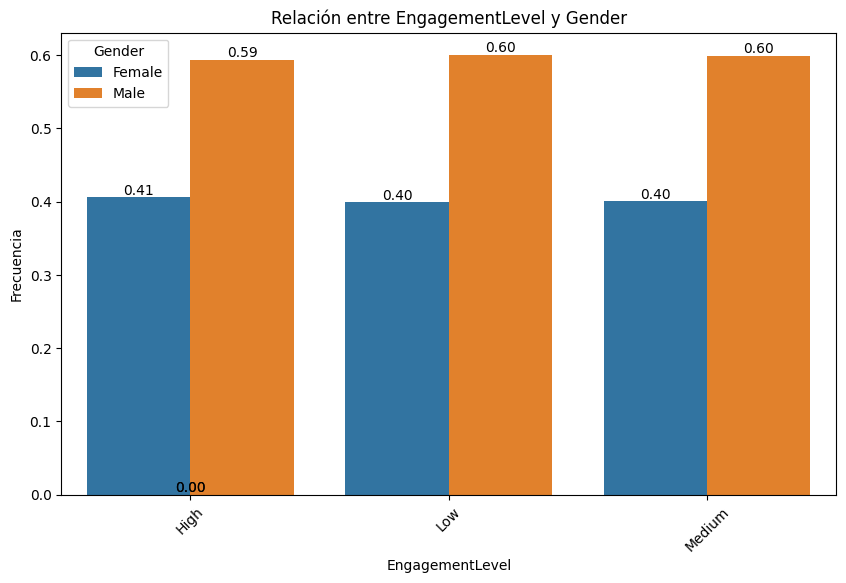

In [64]:
plot_categorical_relationship_fin(df_game_behaviour, "EngagementLevel", "Gender",  relative_freq=True, show_values=True, size_group = 5)

##### Engagement vs Location

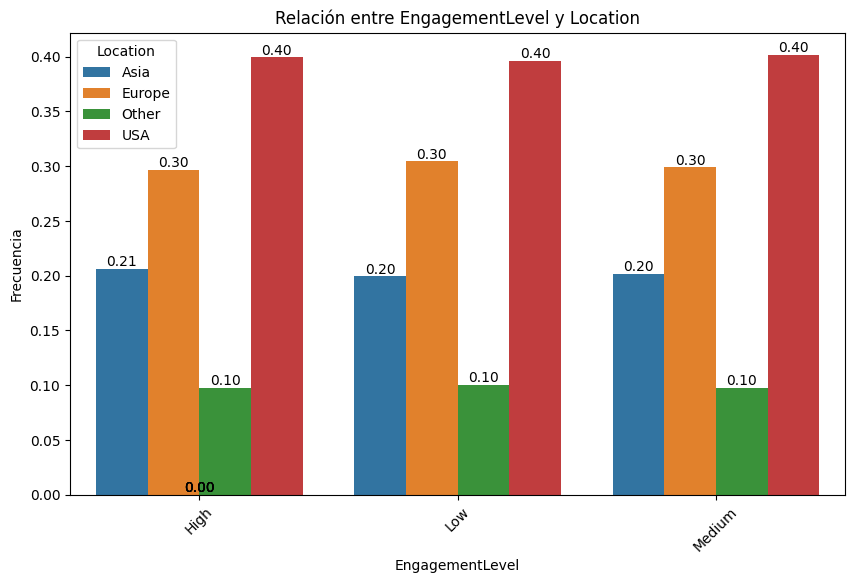

In [65]:
plot_categorical_relationship_fin(df_game_behaviour, "EngagementLevel", "Location",  relative_freq=True, show_values=True, size_group = 5)

##### Engagement vs GameGenre

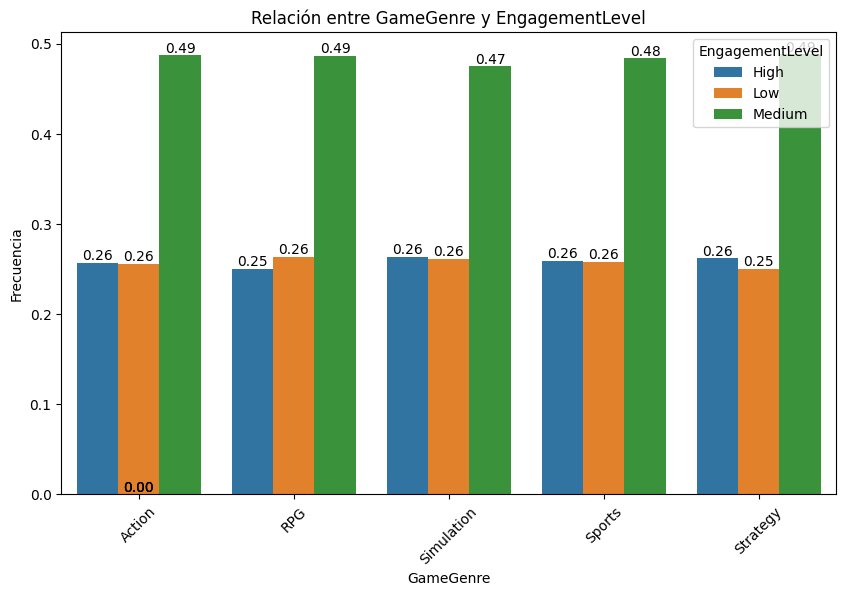

In [66]:
plot_categorical_relationship_fin(df_game_behaviour, "GameGenre", "EngagementLevel",  relative_freq=True, show_values=True, size_group = 5)

##### Engagement vs GameDifficulty

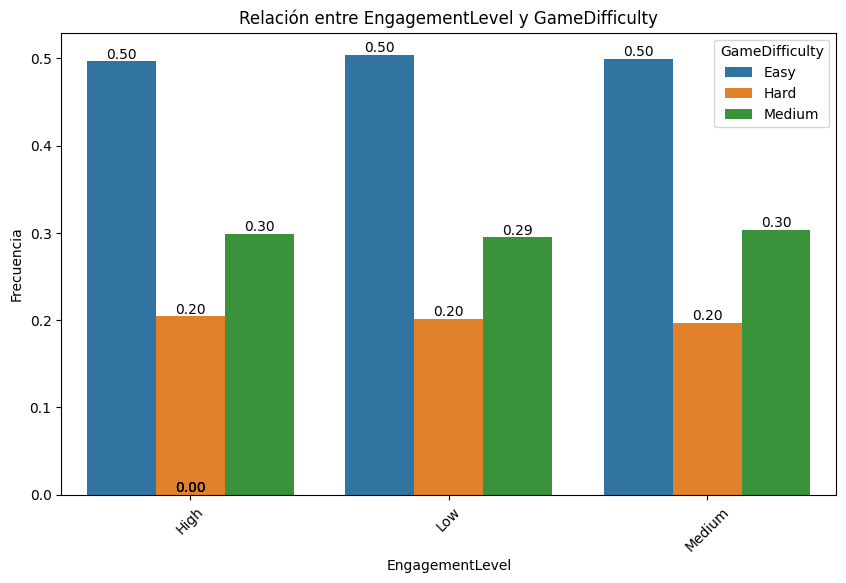

In [67]:
plot_categorical_relationship_fin(df_game_behaviour, "EngagementLevel", "GameDifficulty",  relative_freq=True, show_values=True, size_group = 5)

##### Observaciones:
- Al igual que en compras, a priori ninguna variable categórica influye de forma significativa sobre el nivel de engagement.
- Es necesario hacer comparaciones con el resto de variables numéricas. 

#### Comparación de variables Engagement con variables numéricas

##### Engagement vs PlatTimeHours

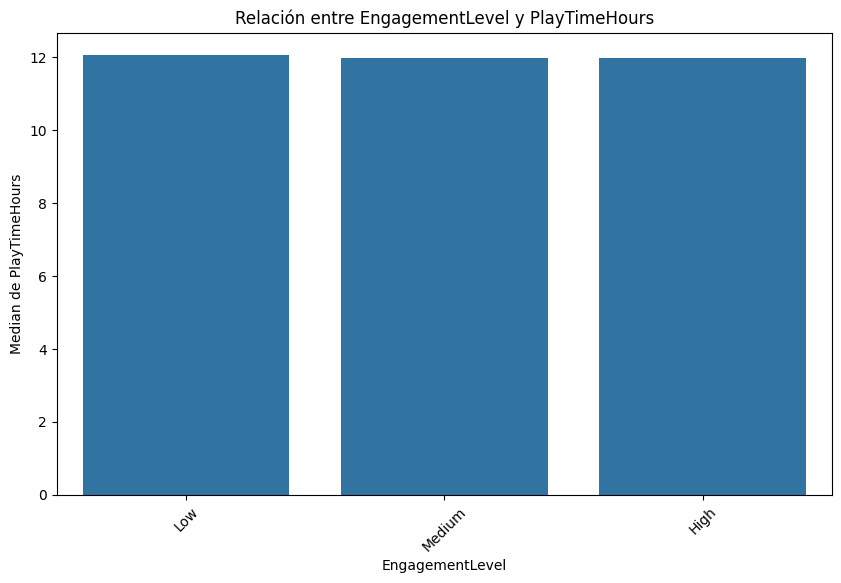

In [68]:
plot_categorical_numerical_relationship(df_game_behaviour, "EngagementLevel","PlayTimeHours",measure="median") # Utilizando mediana

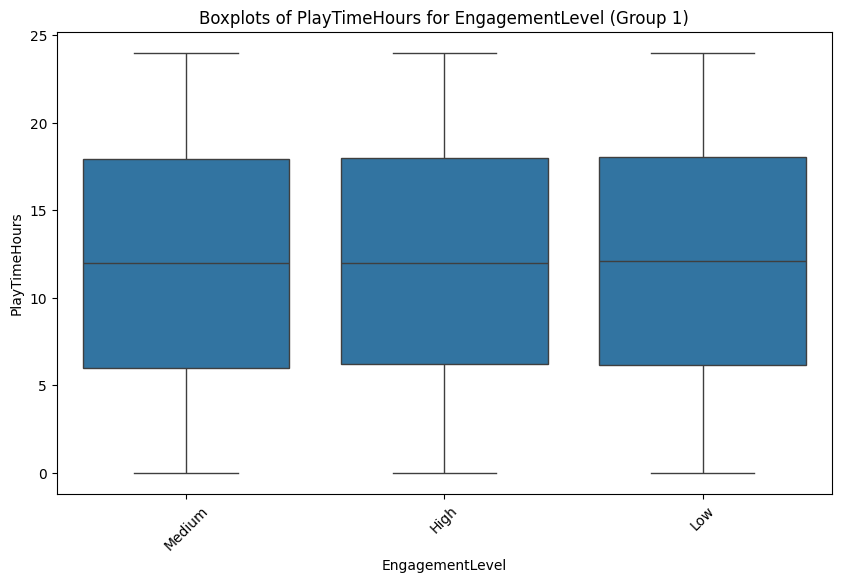

In [69]:
plot_grouped_boxplots(df_game_behaviour,"EngagementLevel","PlayTimeHours")

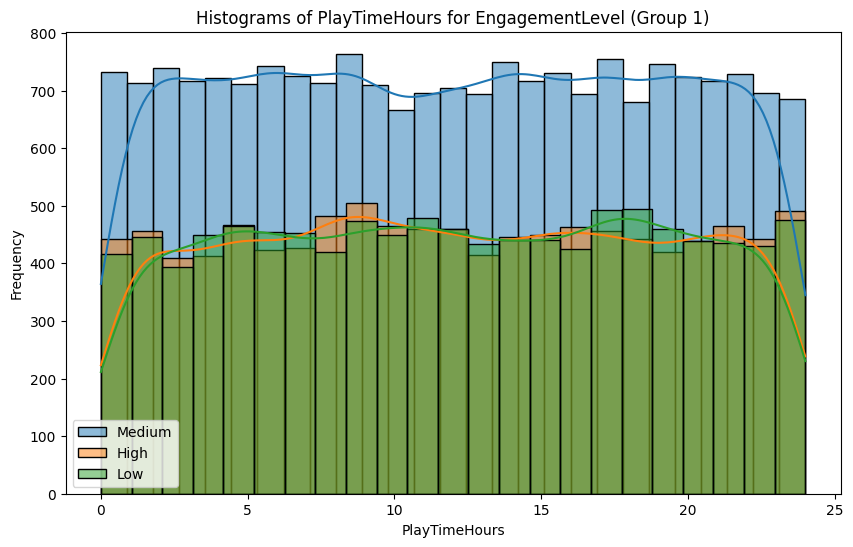

In [70]:
plot_grouped_histograms(df_game_behaviour,"EngagementLevel", "PlayTimeHours", 3)

##### Engagement vs SessionsPerWeek

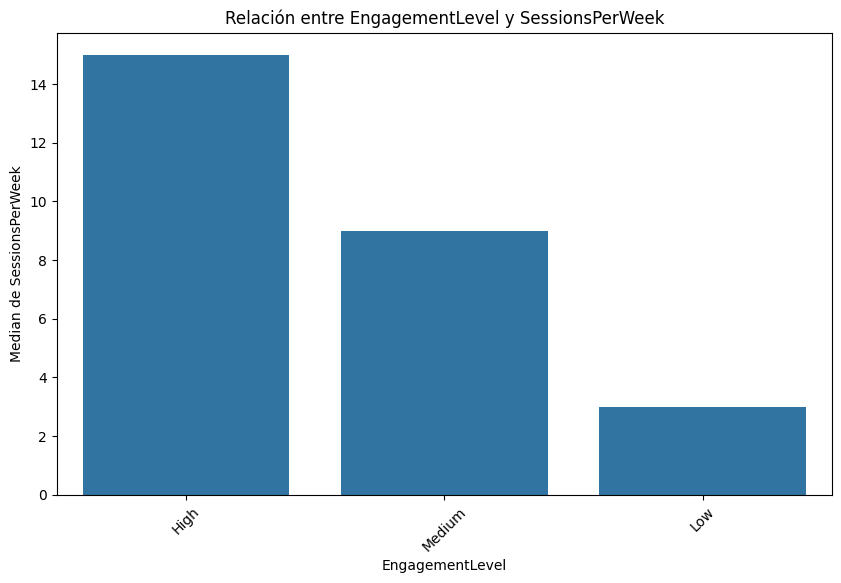

In [71]:
plot_categorical_numerical_relationship(df_game_behaviour, "EngagementLevel","SessionsPerWeek",measure="median") # Utilizando mediana

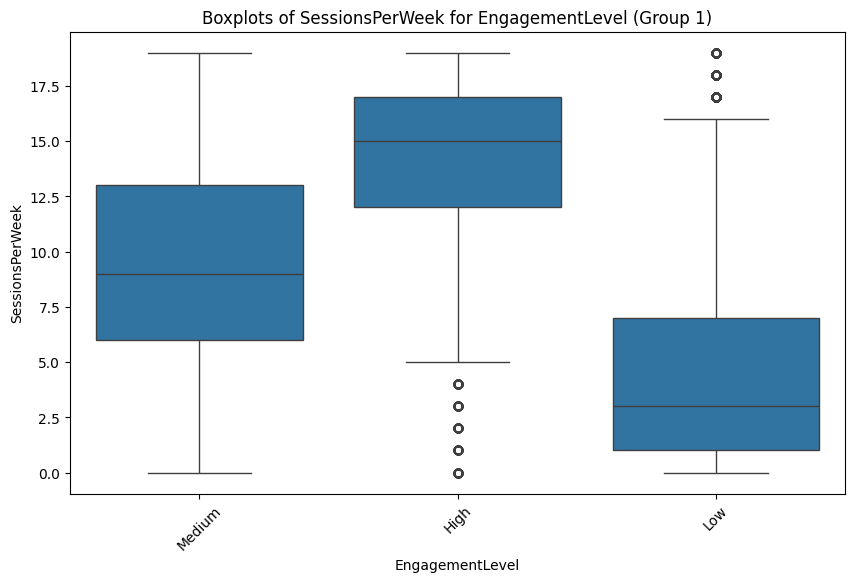

In [72]:
plot_grouped_boxplots(df_game_behaviour,"EngagementLevel","SessionsPerWeek")

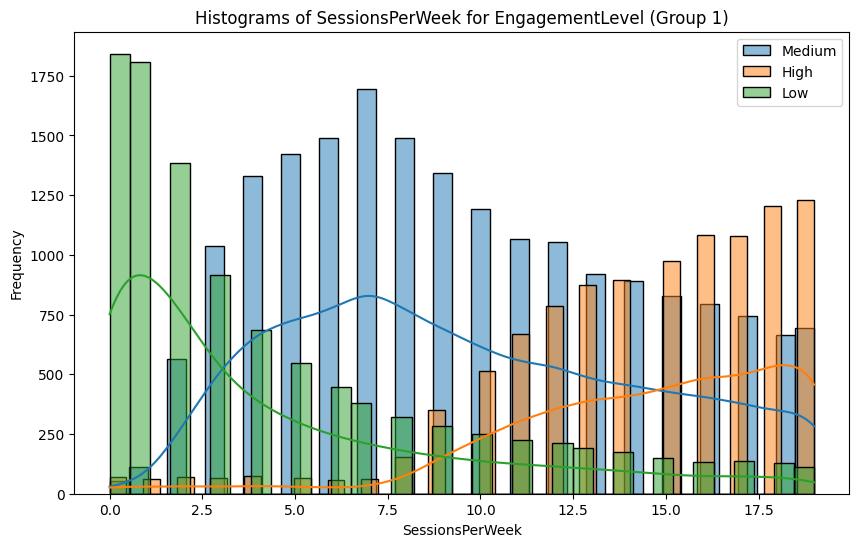

In [73]:
plot_grouped_histograms(df_game_behaviour,"EngagementLevel", "SessionsPerWeek", 3)

#### Test ANOVA:

In [137]:
grupos = df_game_behaviour['EngagementLevel'].unique()  
SessionsperWeek = [df_game_behaviour[df_game_behaviour['EngagementLevel'] == grupo]['SessionsPerWeek'] for grupo in grupos] 

f_val, p_val = stats.f_oneway(*SessionsperWeek) 

print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 11625.820362943938
Valor p: 0.0


##### Engagement vs AchievementsUnlocked

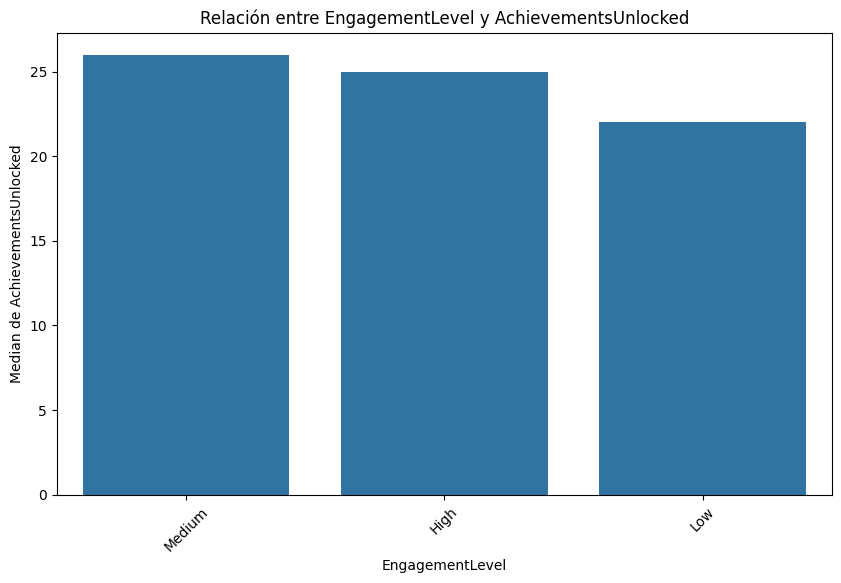

In [74]:
plot_categorical_numerical_relationship(df_game_behaviour, "EngagementLevel","AchievementsUnlocked",measure="median") # Utilizando mediana

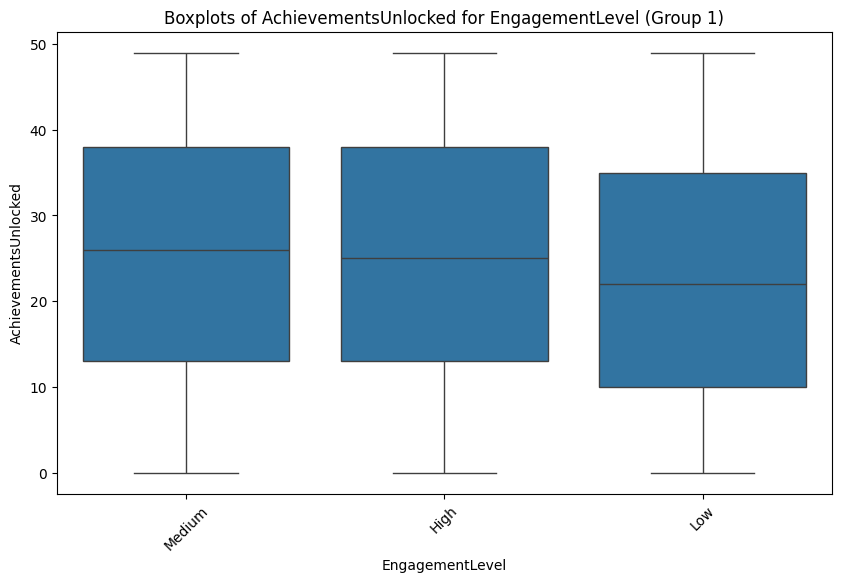

In [75]:
plot_grouped_boxplots(df_game_behaviour,"EngagementLevel","AchievementsUnlocked")

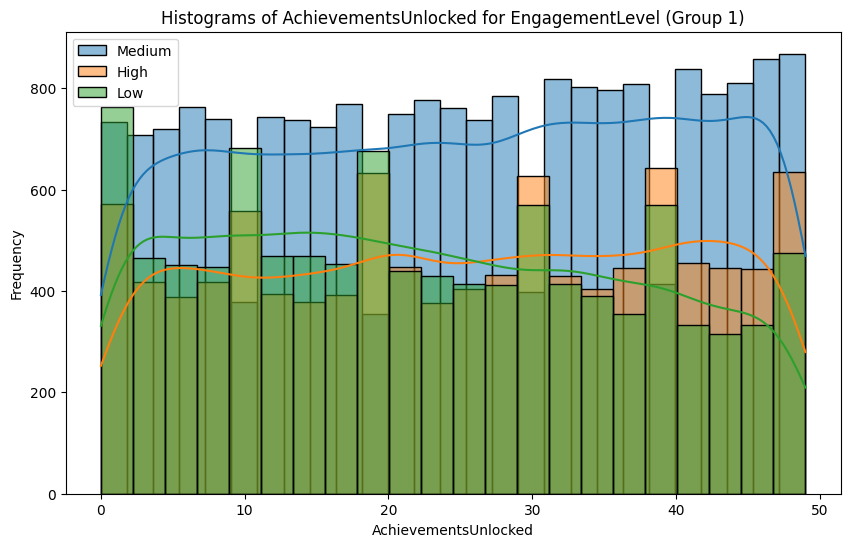

In [76]:
plot_grouped_histograms(df_game_behaviour,"EngagementLevel", "AchievementsUnlocked", 3)

In [141]:
grupos = df_game_behaviour['EngagementLevel'].unique()  
achievements= [df_game_behaviour[df_game_behaviour['EngagementLevel'] == grupo]['AchievementsUnlocked'] for grupo in grupos] 

f_val, p_val = stats.f_oneway(*achievements) 

print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 117.07733777580692
Valor p: 2.0048810813344537e-51


##### Engagement vs PlayerLevel

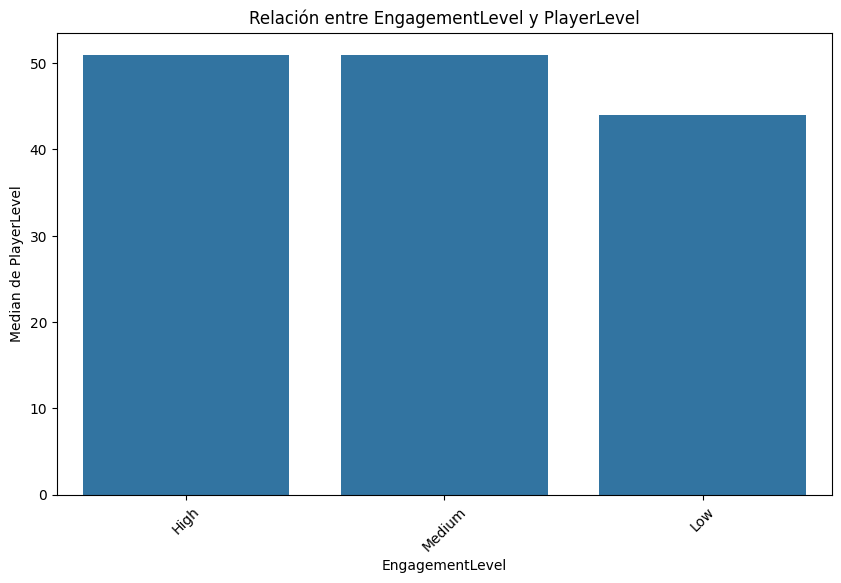

In [77]:
plot_categorical_numerical_relationship(df_game_behaviour, "EngagementLevel","PlayerLevel",measure="median") # Utilizando mediana

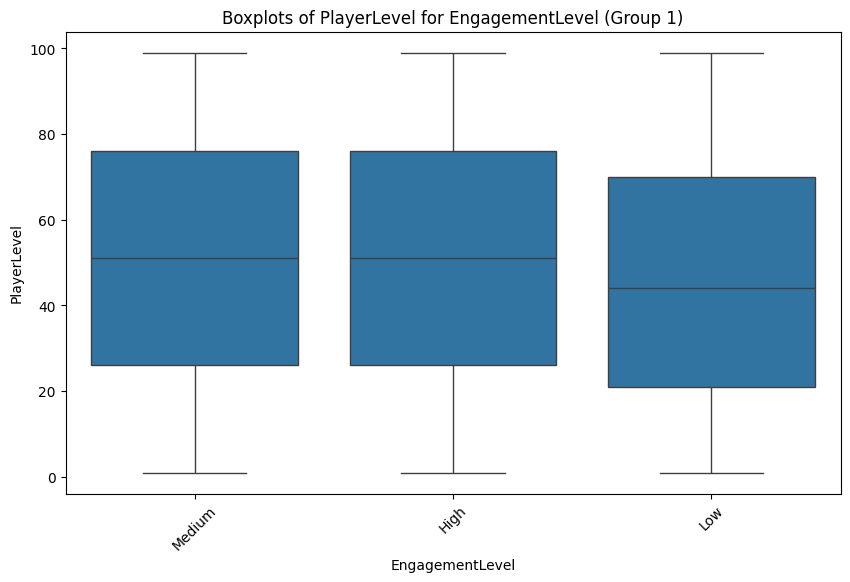

In [78]:
plot_grouped_boxplots(df_game_behaviour,"EngagementLevel","PlayerLevel")

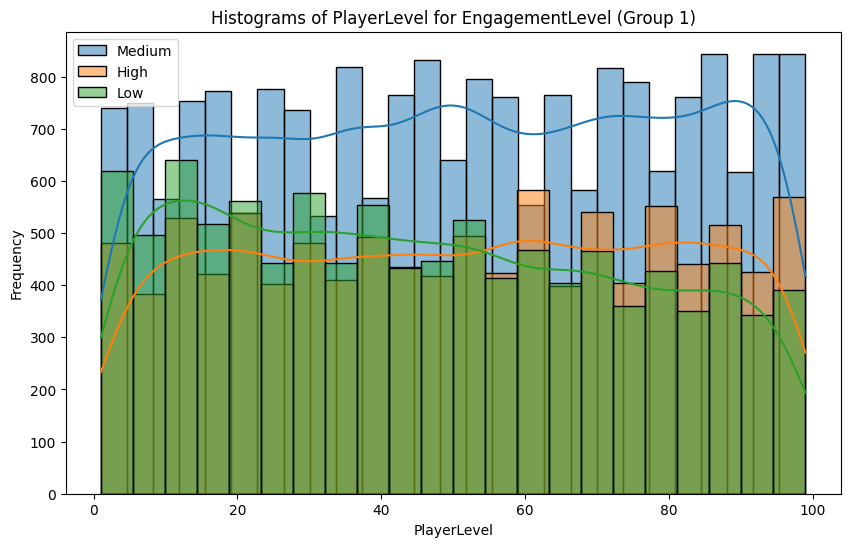

In [79]:
plot_grouped_histograms(df_game_behaviour,"EngagementLevel", "PlayerLevel", 3)

##### Engagement vs Age

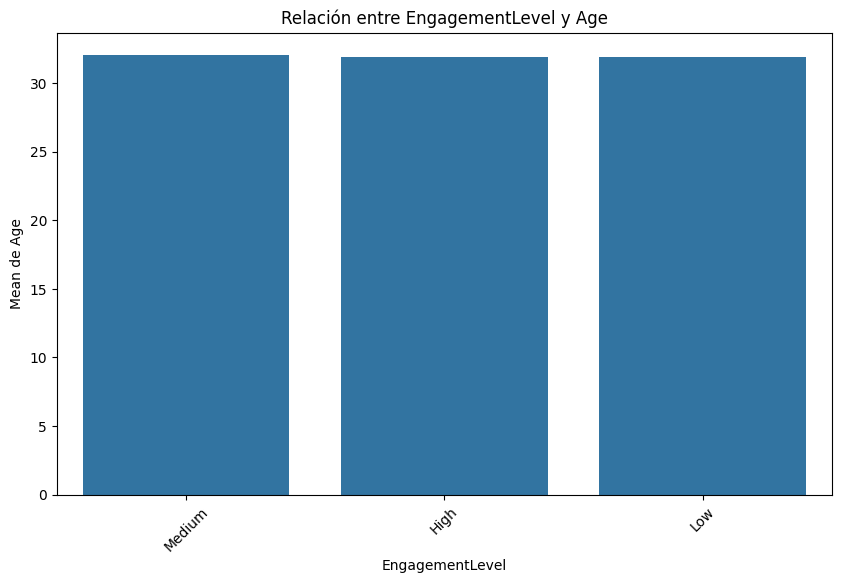

In [80]:
plot_categorical_numerical_relationship(df_game_behaviour, "EngagementLevel","Age",measure="mean") # Utilizando mediana

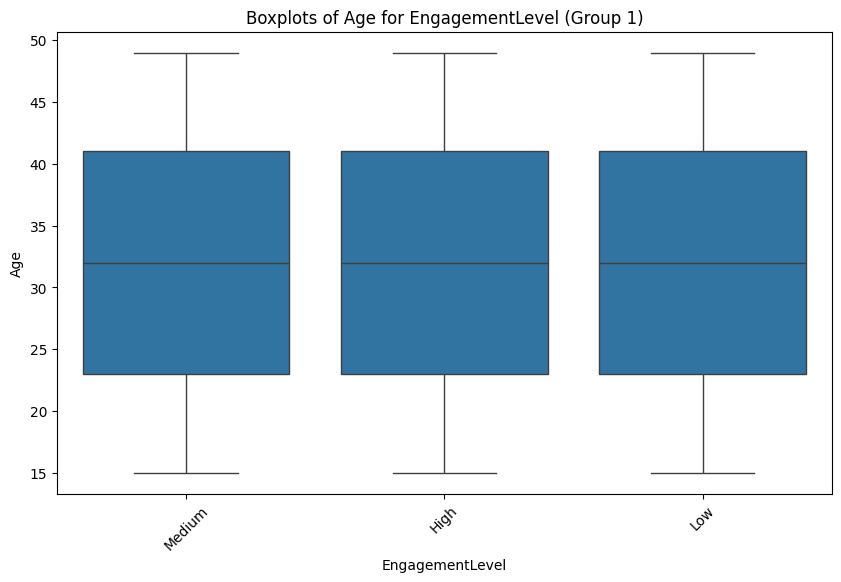

In [81]:
plot_grouped_boxplots(df_game_behaviour,"EngagementLevel","Age")

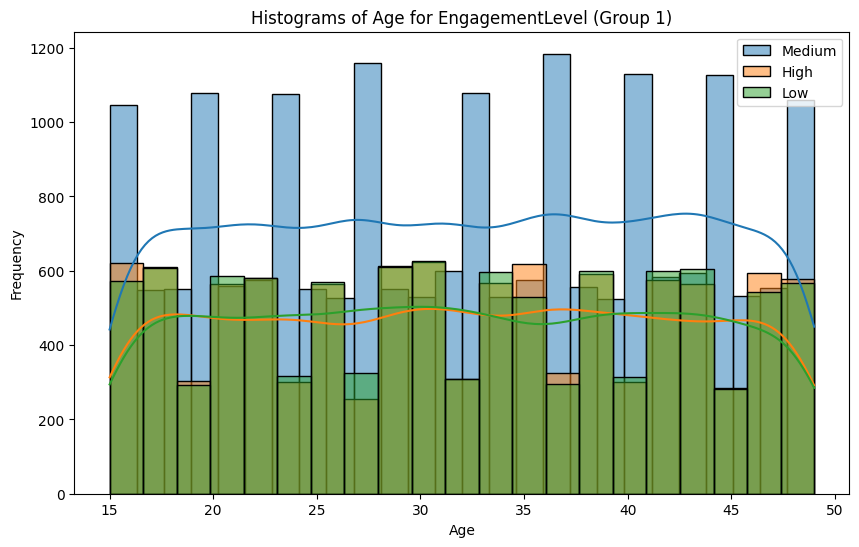

In [82]:
plot_grouped_histograms(df_game_behaviour,"EngagementLevel", "Age", 3)

Pasamos a ver el mapa de calor y matriz de correlación para determinar qué variables numéricas influyen unas en otras:

In [83]:
matriz_correlacion = df_game_behaviour[numericas].corr()
matriz_correlacion

,Age,PlayTimeHours,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
Age,1.000000,0.002462,0.008777,-0.002269,0.001353,-0.001100
PlayTimeHours,0.002462,1.000000,-0.003655,-0.001925,-0.005152,0.003913
SessionsPerWeek,0.008777,-0.003655,1.000000,-0.000620,0.003257,0.003187
AvgSessionDurationMinutes,-0.002269,-0.001925,-0.000620,1.000000,0.001368,-0.002227
PlayerLevel,0.001353,-0.005152,0.003257,0.001368,1.000000,0.006343
AchievementsUnlocked,-0.001100,0.003913,0.003187,-0.002227,0.006343,1.000000


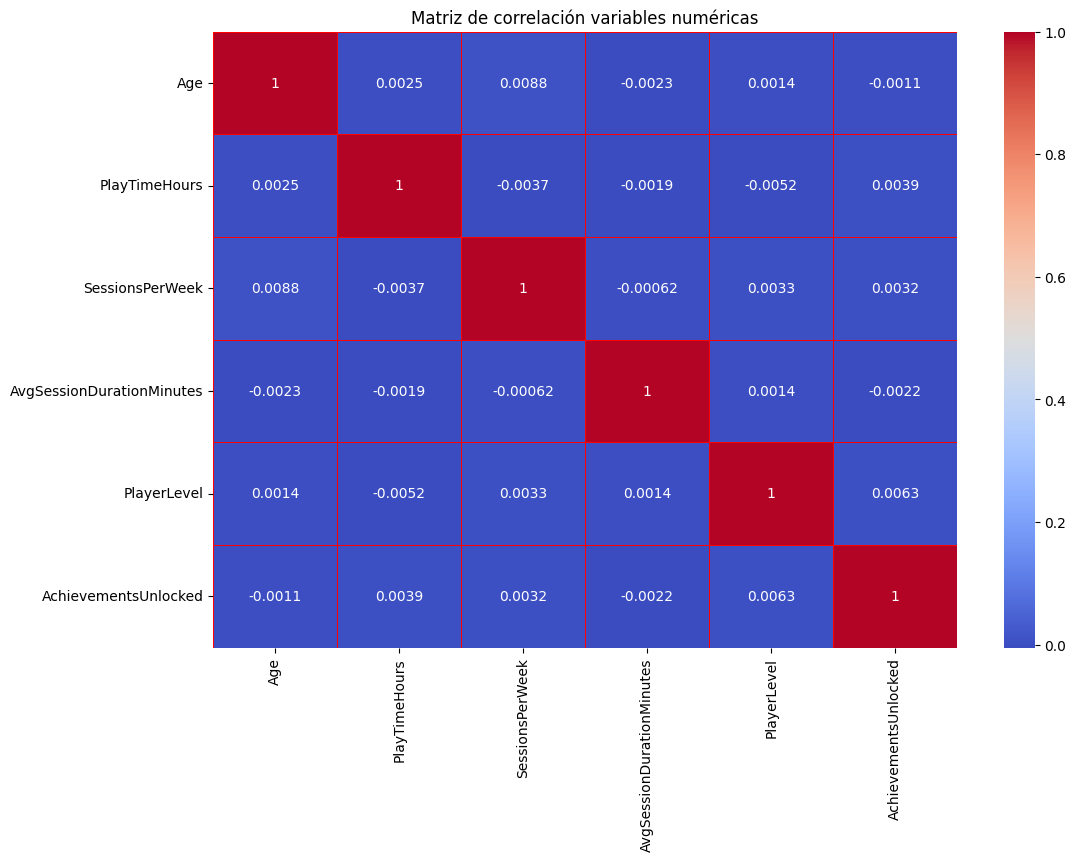

In [84]:
plt.figure(figsize=(12,8))

sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", linewidths=0.5, linecolor="red")
plt.title("Matriz de correlación variables numéricas")

plt.show()

## Comprobamos el comportamiento de la variable compras con respecto a las demás:
Para ello, visualizamos la distribución de la variable compras con respecto al resto de categóricas y realizamos test Chi2. Para la comparación entre variables numéricas nos apoyamos en el test ANOVA.

### Objetivos: 
- Aceptar o rechazar la hipótesis nula.
- Ver qué variables afectan a las compras.

### Buscando la relación entre compras y engagement:

In [85]:
from scipy.stats import chi2_contingency

In [86]:
tabla_contingencia_purchase_engagement = pd.crosstab(df_game_behaviour["InGamePurchases"], df_game_behaviour["EngagementLevel"])
tabla_contingencia_purchase_engagement

EngagementLevel,High,Low,Medium
InGamePurchases,,,
0,8202,8287,15504
1,2134,2037,3870


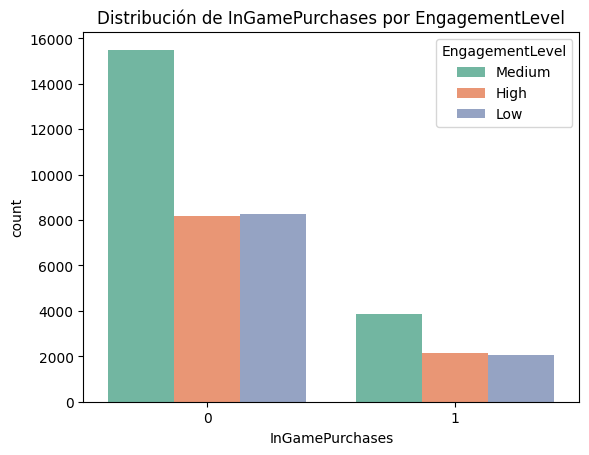

In [87]:
sns.countplot(df_game_behaviour, x="InGamePurchases", hue="EngagementLevel", palette="Set2")
plt.title("Distribución de InGamePurchases por EngagementLevel");

In [88]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_purchase_engagement)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 2.9813995085885474
P-Value: 0.2252150052205898
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 8259.97022531  8250.38047659 15482.6492981 ]
 [ 2076.02977469  2073.61952341  3891.3507019 ]]


### Buscando la relación entre compras y género de juego:

In [89]:
tabla_contingencia_purchase_gamegenre = pd.crosstab(df_game_behaviour["InGamePurchases"], df_game_behaviour["GameGenre"])
tabla_contingencia_purchase_gamegenre

GameGenre,Action,RPG,Simulation,Sports,Strategy
InGamePurchases,,,,,
0,6486,6376,6373,6426,6332
1,1553,1576,1610,1622,1680


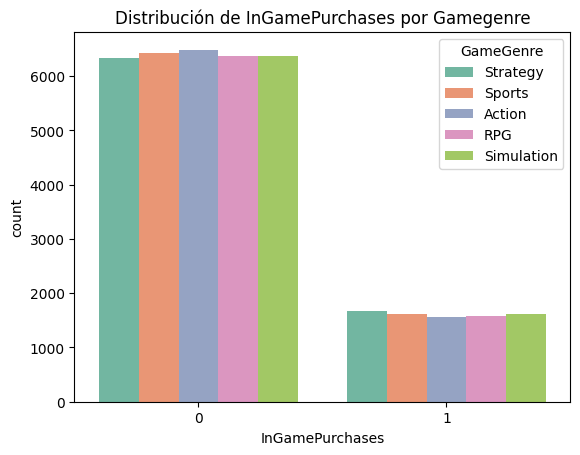

In [90]:
sns.countplot(df_game_behaviour, x="InGamePurchases", hue="GameGenre", palette="Set2")
plt.title("Distribución de InGamePurchases por Gamegenre");

In [91]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_purchase_gamegenre)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 7.249371812897175
P-Value: 0.12328242100389752
Grados de Libertad: 4
Tabla de Frecuencias Esperadas:
 [[6424.33249238 6354.80681421 6379.58033172 6431.52480392 6402.75555778]
 [1614.66750762 1597.19318579 1603.41966828 1616.47519608 1609.24444222]]


### Buscando la relación entre compras y sexo:

In [92]:
tabla_contingencia_purchase_gender = pd.crosstab(df_game_behaviour["InGamePurchases"], df_game_behaviour["Gender"])
tabla_contingencia_purchase_gender

Gender,Female,Male
InGamePurchases,,
0,12895,19098
1,3180,4861


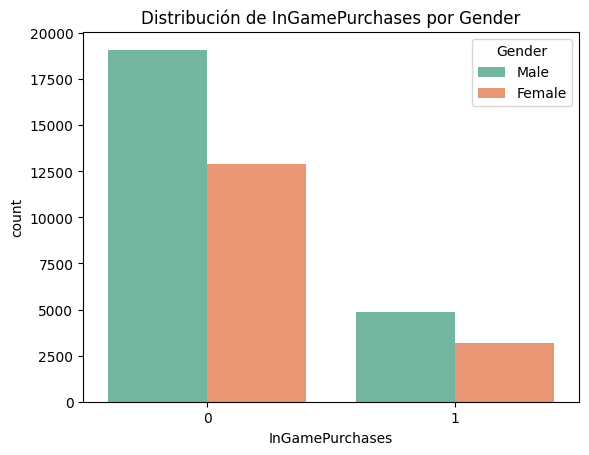

In [93]:
sns.countplot(df_game_behaviour, x="InGamePurchases", hue="Gender", palette="Set2")
plt.title("Distribución de InGamePurchases por Gender");

In [94]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_purchase_gender)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 1.5065409685929265
P-Value: 0.21966766351402373
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[12846.26754758 19146.73245242]
 [ 3228.73245242  4812.26754758]]


### Buscando la relación entre compras y localización:

In [95]:
tabla_contingencia_purchase_location = pd.crosstab(df_game_behaviour["InGamePurchases"], df_game_behaviour["Location"])
tabla_contingencia_purchase_location

Location,Asia,Europe,Other,USA
InGamePurchases,,,,
0,6435,9561,3175,12822
1,1660,2443,760,3178


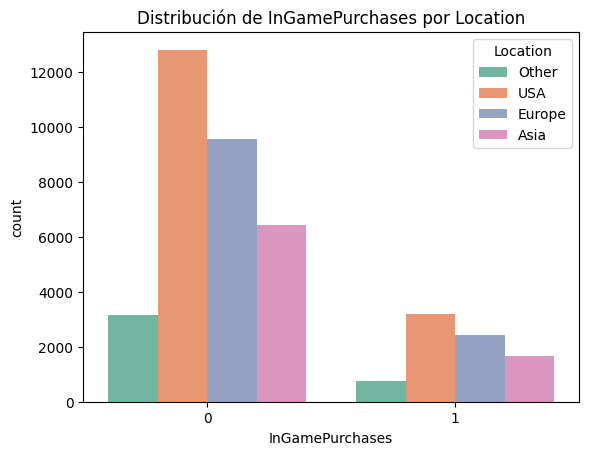

In [96]:
sns.countplot(df_game_behaviour, x="InGamePurchases", hue="Location", palette="Set2")
plt.title("Distribución de InGamePurchases por Location");

In [97]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_purchase_location)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 3.37861223123189
P-Value: 0.33685029773325126
Grados de Libertad: 3
Tabla de Frecuencias Esperadas:
 [[ 6469.08465304  9592.9452965   3144.63843233 12786.33161812]
 [ 1625.91534696  2411.0547035    790.36156767  3213.66838188]]


### Buscando la relación entre compras y dificultad:

In [98]:
tabla_contingencia_purchase_dificultad = pd.crosstab(df_game_behaviour["InGamePurchases"], df_game_behaviour["GameDifficulty"])
tabla_contingencia_purchase_dificultad

GameDifficulty,Easy,Hard,Medium
InGamePurchases,,,
0,16020,6407,9566
1,3995,1601,2445


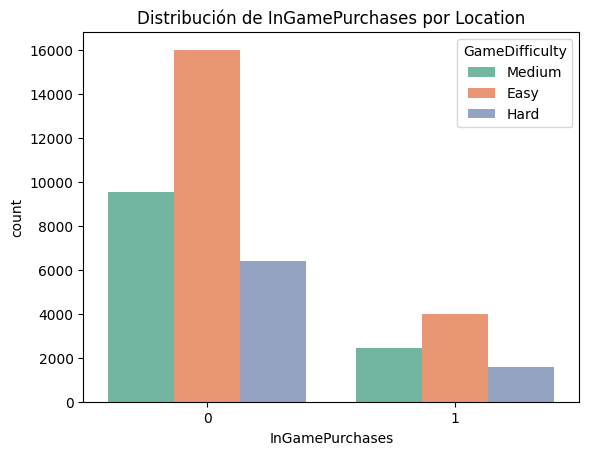

In [99]:
sns.countplot(df_game_behaviour, x="InGamePurchases", hue="GameDifficulty", palette="Set2")
plt.title("Distribución de InGamePurchases por Location");

In [100]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_purchase_dificultad)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 0.7883525860580769
P-Value: 0.6742351827998125
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[15994.90170855  6399.55897487  9598.53931658]
 [ 4020.09829145  1608.44102513  2412.46068342]]


### Buscamos la relación entre compras y edad:

(2,)


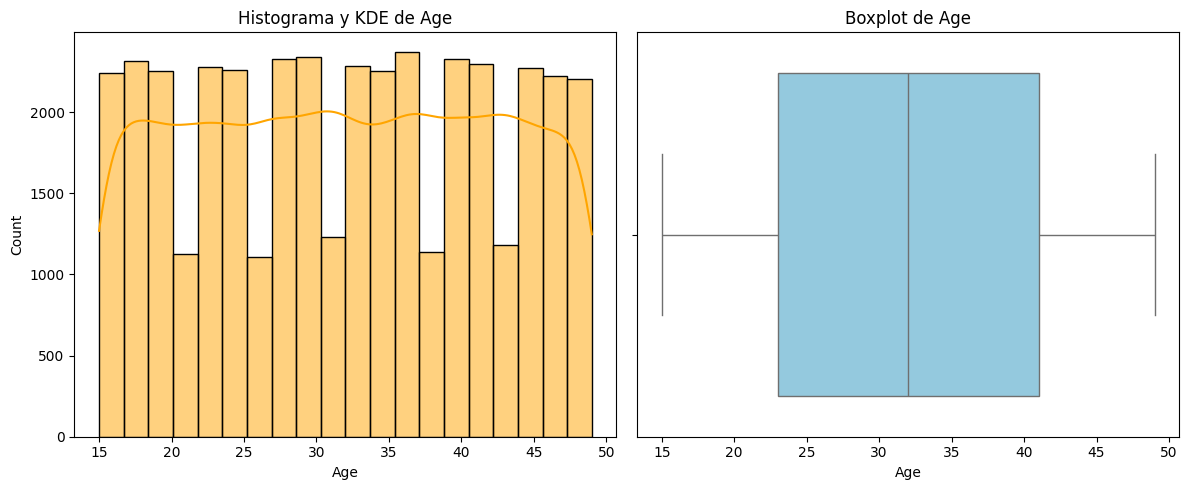

In [102]:
plot_combined_graphs(df_game_behaviour,["Age"]);

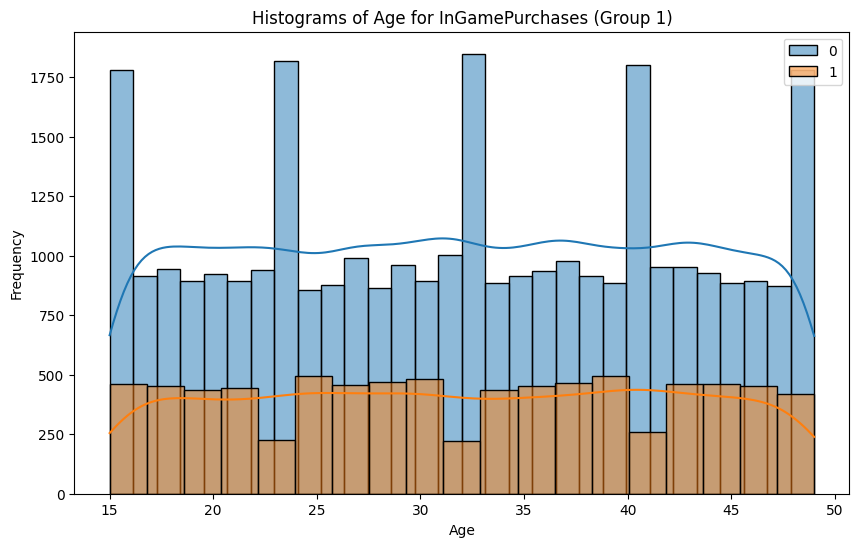

In [103]:
plot_grouped_histograms(df_game_behaviour, cat_col="InGamePurchases",num_col="Age", group_size= 2)

#### Test ANOVA

In [105]:
grupos = df_game_behaviour['InGamePurchases'].unique()  # Obtener los valores únicos de la variable categórica
age = [df_game_behaviour[df_game_behaviour['InGamePurchases'] == grupo]['Age'] for grupo in grupos] # vemos las edades y lo metemos en una lista

f_val, p_val = stats.f_oneway(*age) 

print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 0.0013833841863748395
Valor p: 0.9703306093272384


### Buscamos la relación entre compras y sesiones a la semana:

(2,)


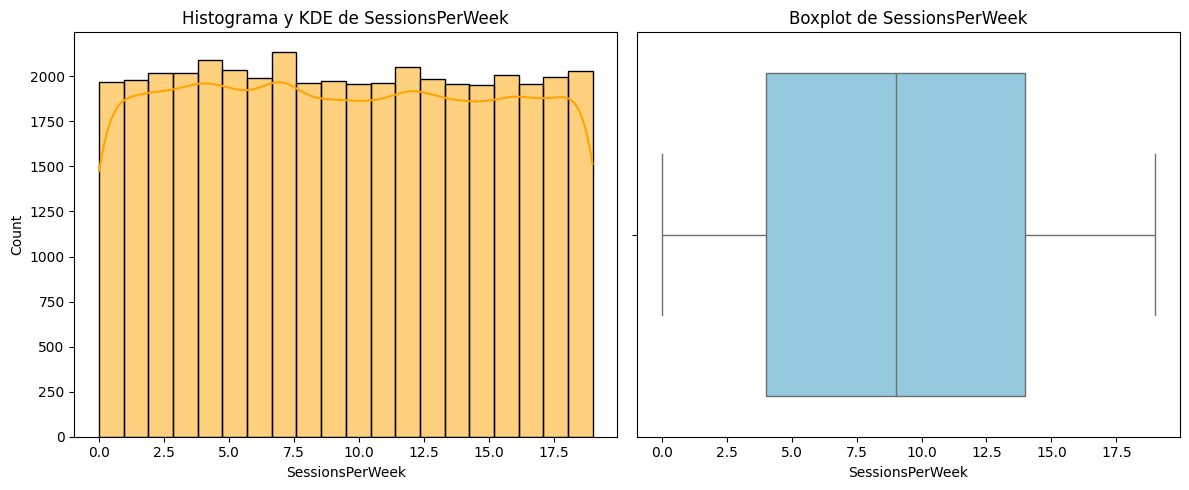

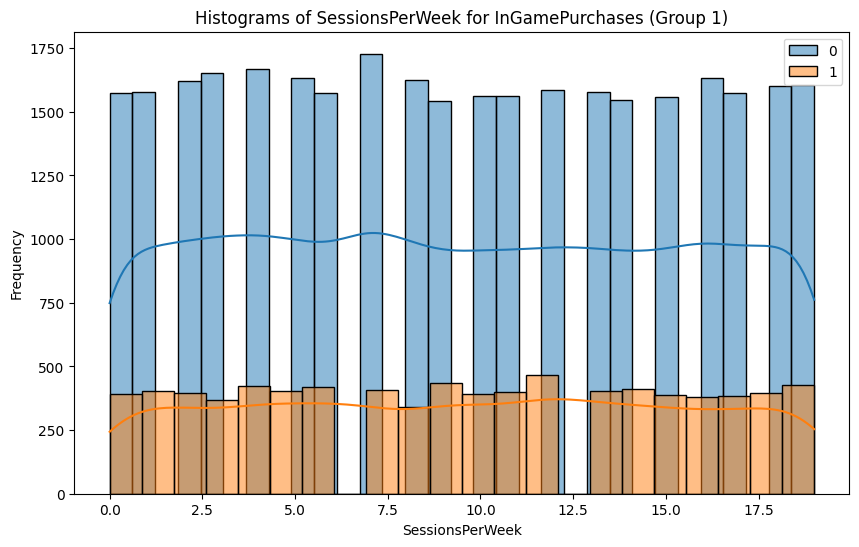

In [106]:
plot_combined_graphs(df_game_behaviour,["SessionsPerWeek"])
plot_grouped_histograms(df_game_behaviour, cat_col="InGamePurchases",num_col="SessionsPerWeek", group_size= 2)


#### Test ANOVA

In [107]:
grupos = df_game_behaviour['InGamePurchases'].unique() 
sessions = [df_game_behaviour[df_game_behaviour['InGamePurchases'] == grupo]['SessionsPerWeek'] for grupo in grupos] 

f_val, p_val = stats.f_oneway(*sessions) 

print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 1.0545707782431861
Valor p: 0.3044629439610615


### Buscamos la relación entre compras y logros desbloqueados:

(2,)


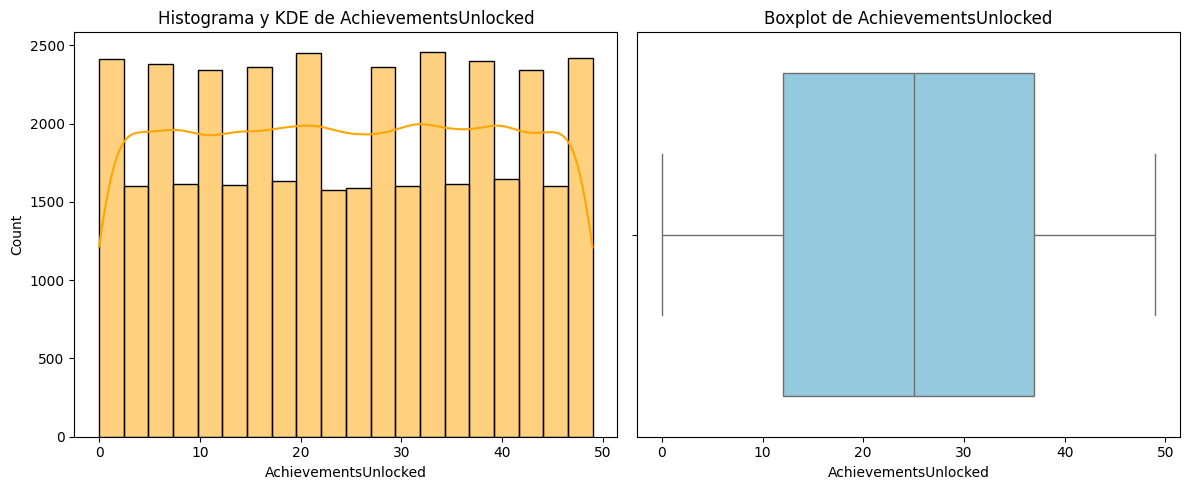

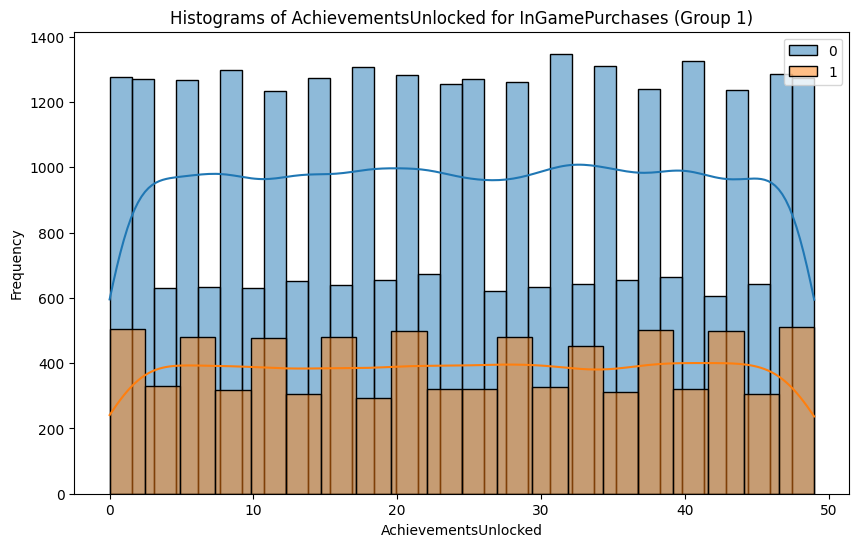

In [108]:
plot_combined_graphs(df_game_behaviour,["AchievementsUnlocked"])
plot_grouped_histograms(df_game_behaviour, cat_col="InGamePurchases",num_col="AchievementsUnlocked", group_size= 2)

#### Test ANOVA

In [109]:
grupos = df_game_behaviour['InGamePurchases'].unique() 
logros = [df_game_behaviour[df_game_behaviour['InGamePurchases'] == grupo]['AchievementsUnlocked'] for grupo in grupos] 

f_val, p_val = stats.f_oneway(*logros) 

print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 0.0003814881443128732
Valor p: 0.9844170291683776


### Buscamos la relación entre compras y horas de juego:

(2,)


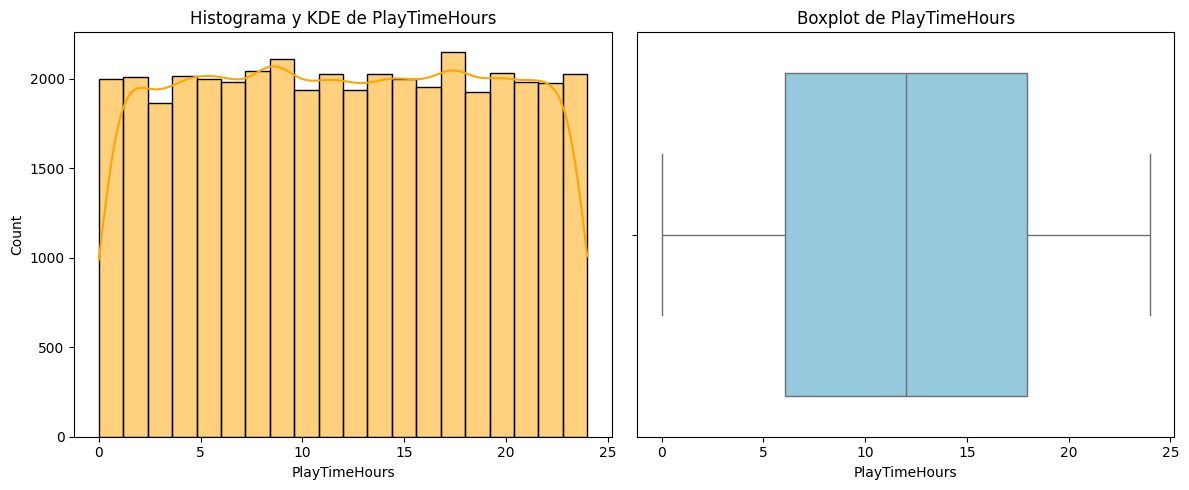

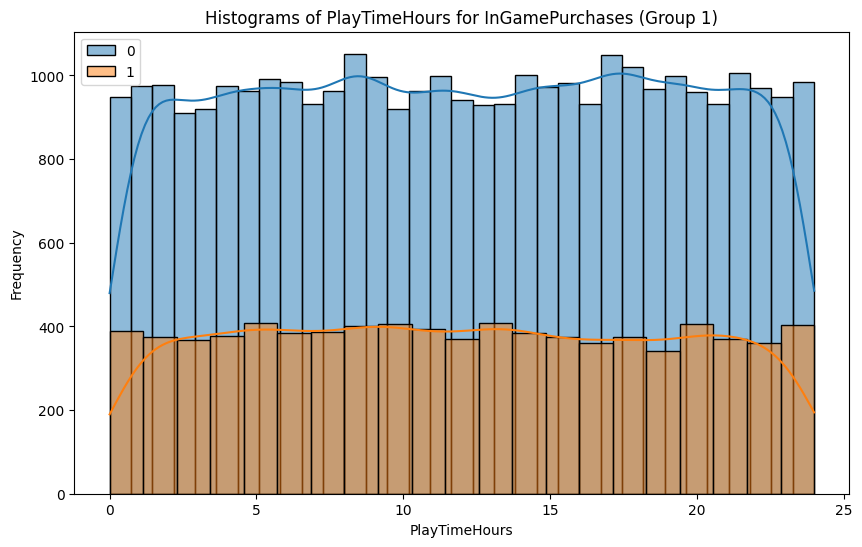

In [110]:
plot_combined_graphs(df_game_behaviour,["PlayTimeHours"])
plot_grouped_histograms(df_game_behaviour, cat_col="InGamePurchases",num_col="PlayTimeHours", group_size= 2)

#### Test ANOVA

In [111]:
grupos = df_game_behaviour['InGamePurchases'].unique() 
tiempo = [df_game_behaviour[df_game_behaviour['InGamePurchases'] == grupo]['PlayTimeHours'] for grupo in grupos] 

f_val, p_val = stats.f_oneway(*tiempo) 

print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 1.4733505386612102
Valor p: 0.2248249583481836


### Buscamos la relación entre compras y nivel del jugador:

(2,)


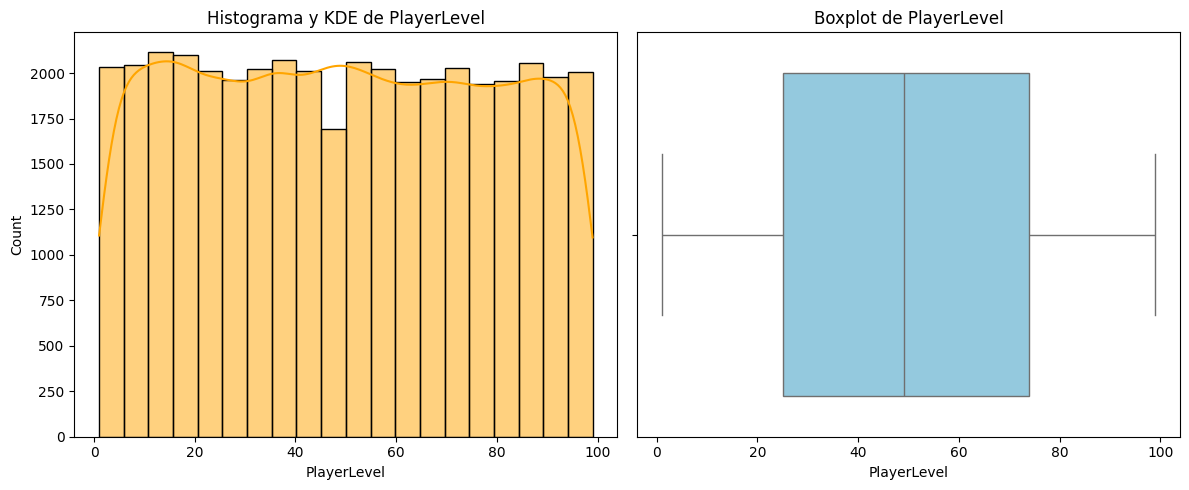

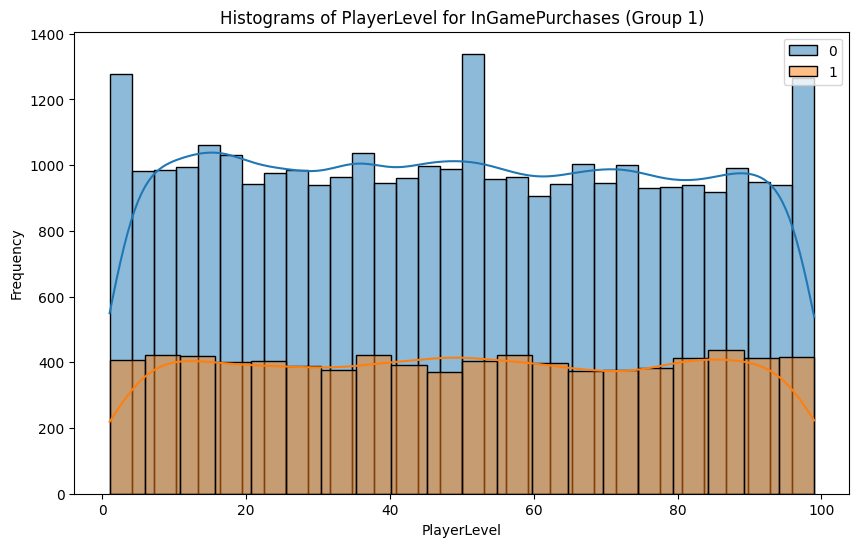

In [112]:
plot_combined_graphs(df_game_behaviour,["PlayerLevel"])
plot_grouped_histograms(df_game_behaviour, cat_col="InGamePurchases",num_col="PlayerLevel", group_size= 2)

#### Test ANOVA

In [113]:
grupos = df_game_behaviour['InGamePurchases'].unique() 
nivel = [df_game_behaviour[df_game_behaviour['InGamePurchases'] == grupo]['PlayerLevel'] for grupo in grupos] 

f_val, p_val = stats.f_oneway(*nivel) 

print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 1.7040944017603312
Valor p: 0.1917608903745341


### H0: No existe relación entre las compras dentro del juego y el nivel de egagement de los jugadores.
Todos los resultado del test ANOVA han devuelto un valor p mayor que 0.05, no podemos rechazar la hipotesis nula. Aparentemente no existe relacion entre el engagement de los jugadores y la decisión de compra. Tampoco existe evidencia de que el resto de variables influya positivamente.

## Analizamos la relación entre edad e inicios de sesiones por semana:

(2,)


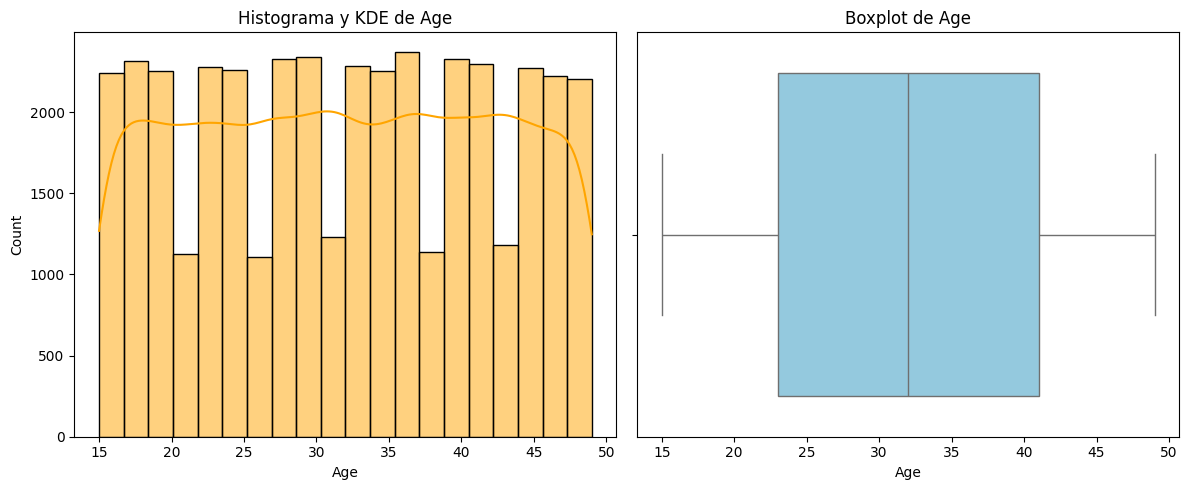

(2,)


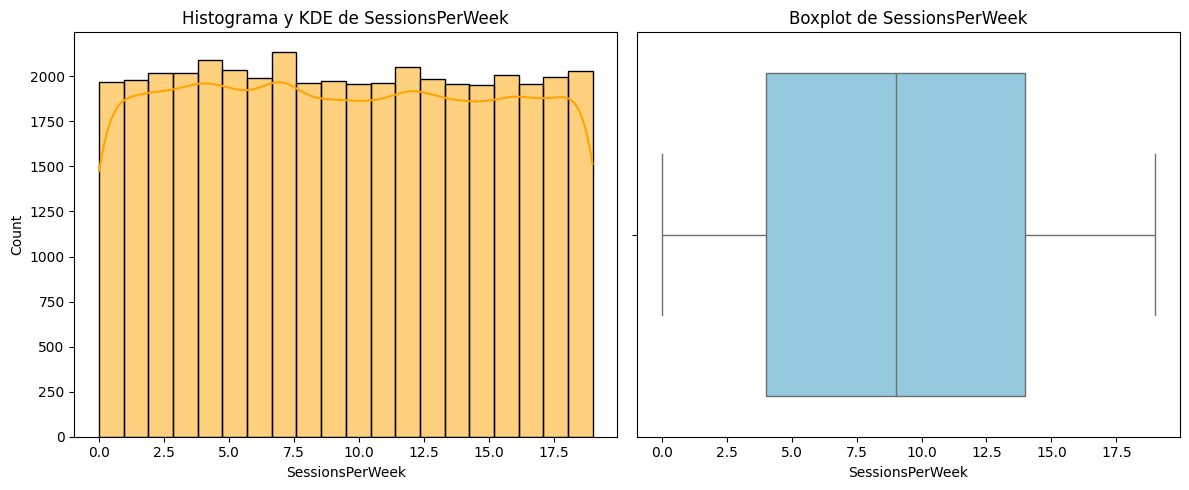

In [114]:
plot_combined_graphs(df_game_behaviour,["Age"])
plot_combined_graphs(df_game_behaviour,["SessionsPerWeek"])

In [115]:
df_game_behaviour[["Age","SessionsPerWeek"]].describe()

,Age,SessionsPerWeek
count,40034.000000,40034.000000
mean,31.992531,9.471774
std,10.043227,5.763667
min,15.000000,0.000000
25%,23.000000,4.000000
50%,32.000000,9.000000
75%,41.000000,14.000000
max,49.000000,19.000000


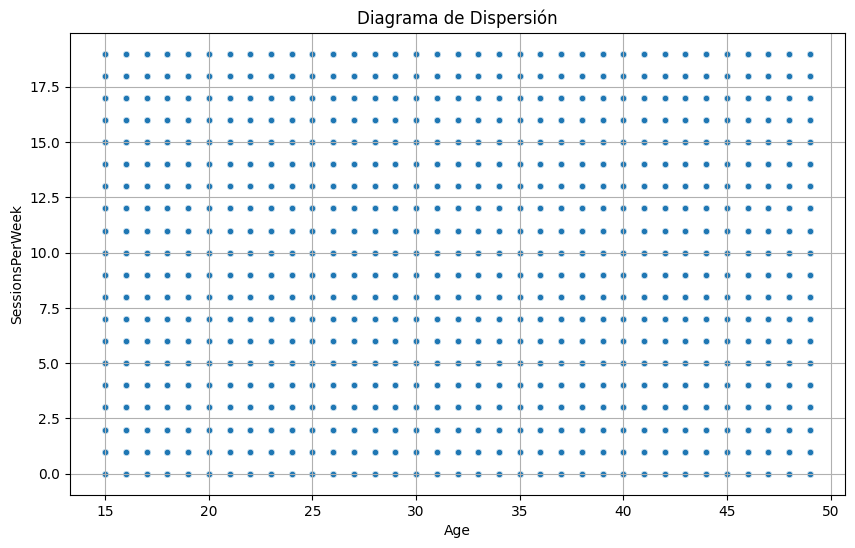

In [116]:
grafico_dispersion_con_correlacion(df_game_behaviour,"Age", "SessionsPerWeek", 20)

Observaciones:
- Aquí se podría segmentar por grupos de edad, ya que se observan grupos pequeños que incician sesión un menor número de veces por semana. 
- Un usuario medio de 32 años, realiza un media de 9,5 sesiones a la semana.

## Analizamos la relación entre nivel del jugador, sesiones por semana y logros desbloqueados:

(3, 2)


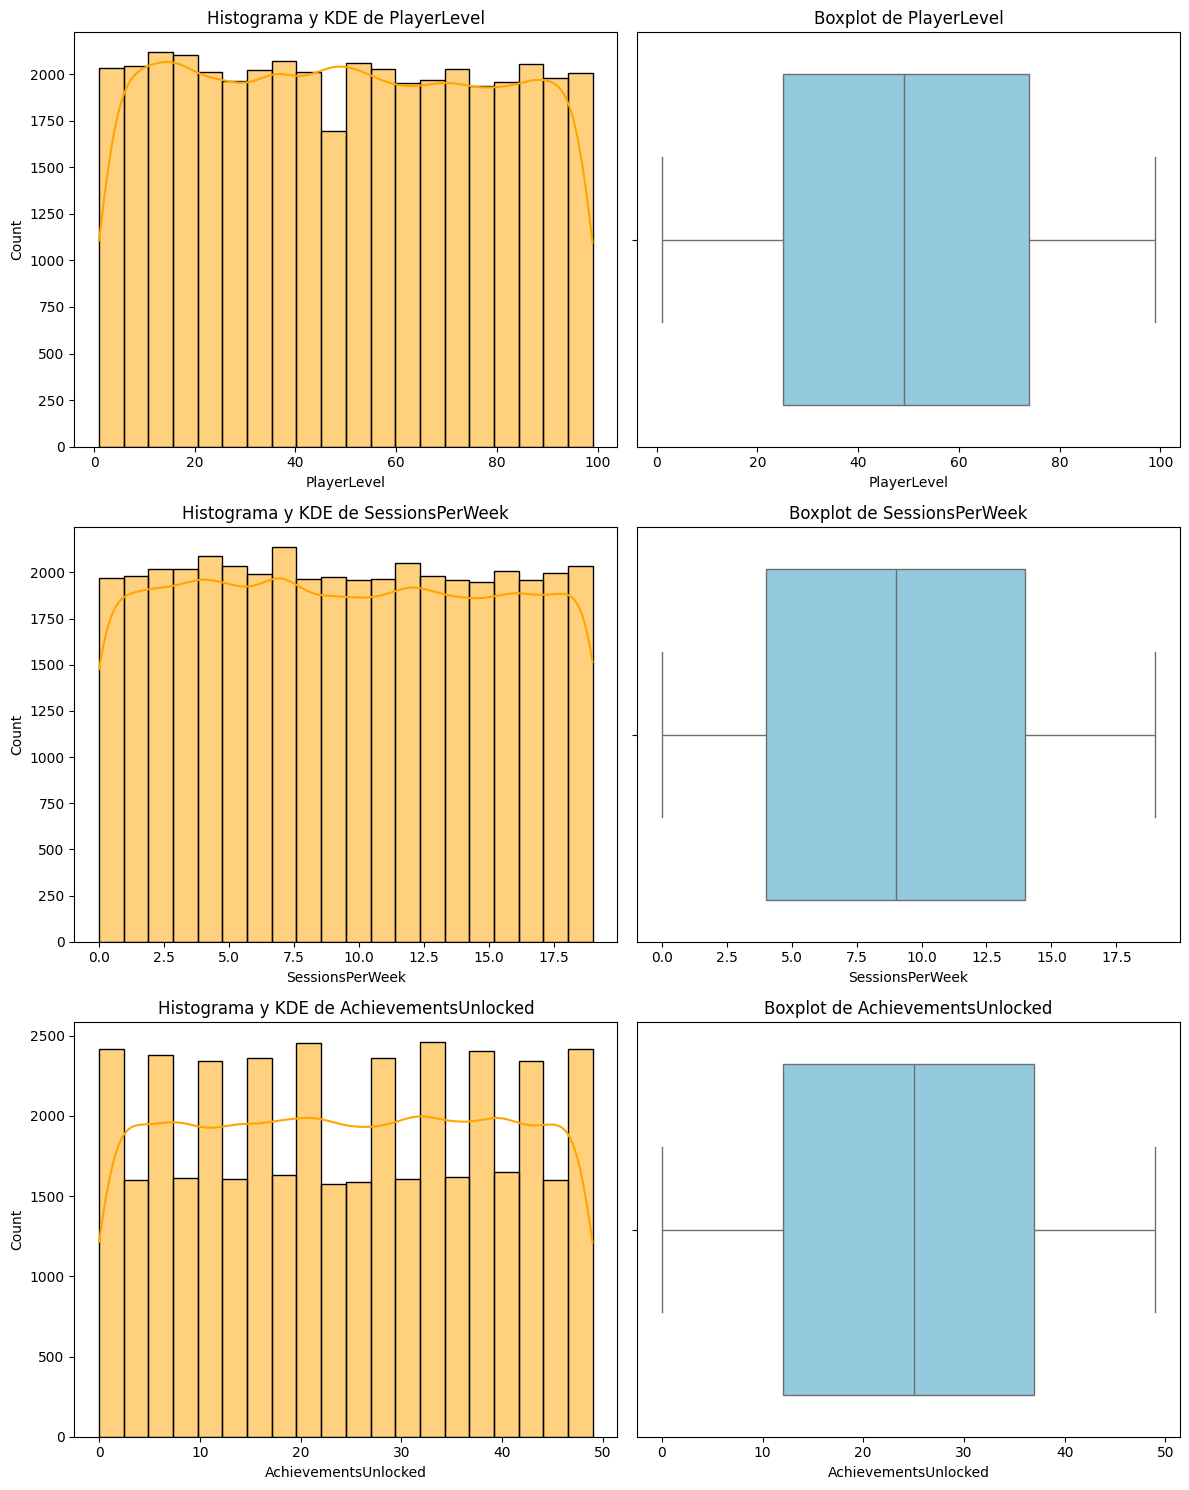

In [117]:
plot_combined_graphs(df_game_behaviour,["PlayerLevel", "SessionsPerWeek", "AchievementsUnlocked"])

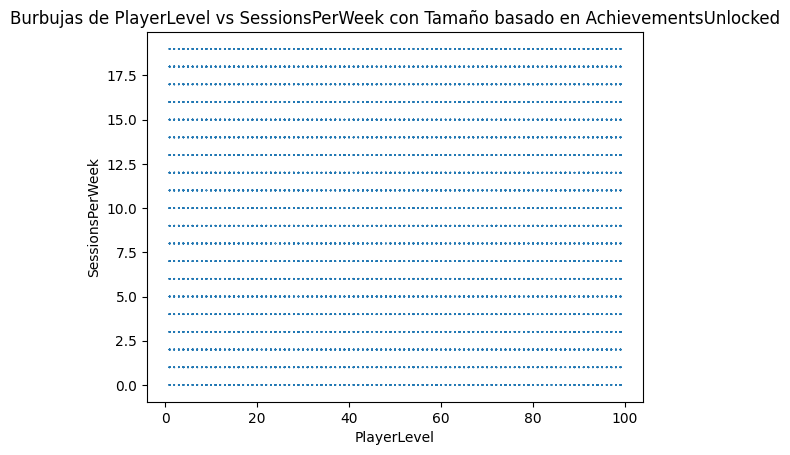

In [118]:
bubble_plot(df_game_behaviour,"PlayerLevel", "SessionsPerWeek", "AchievementsUnlocked", scale = 1000)

### Género de juego y logros

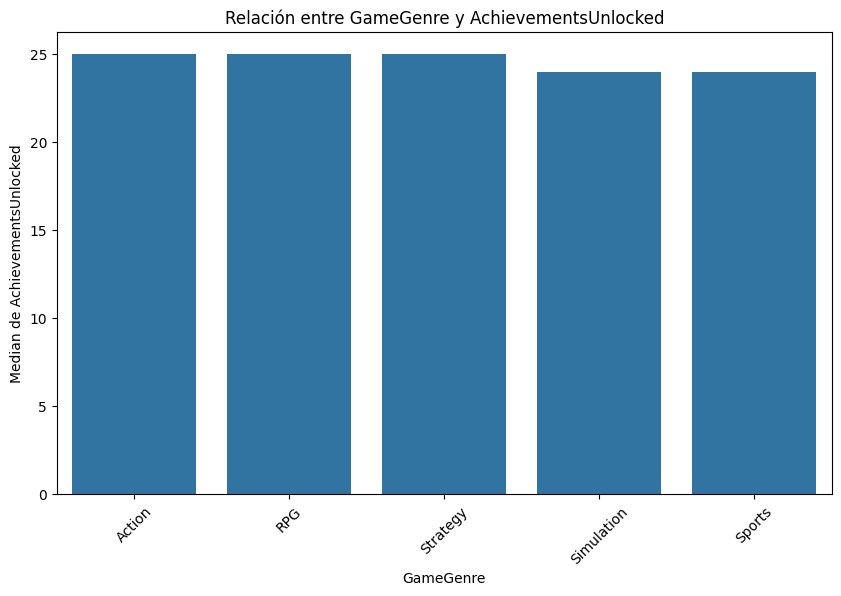

In [119]:
plot_categorical_numerical_relationship(df_game_behaviour,"GameGenre","AchievementsUnlocked", measure = "median")

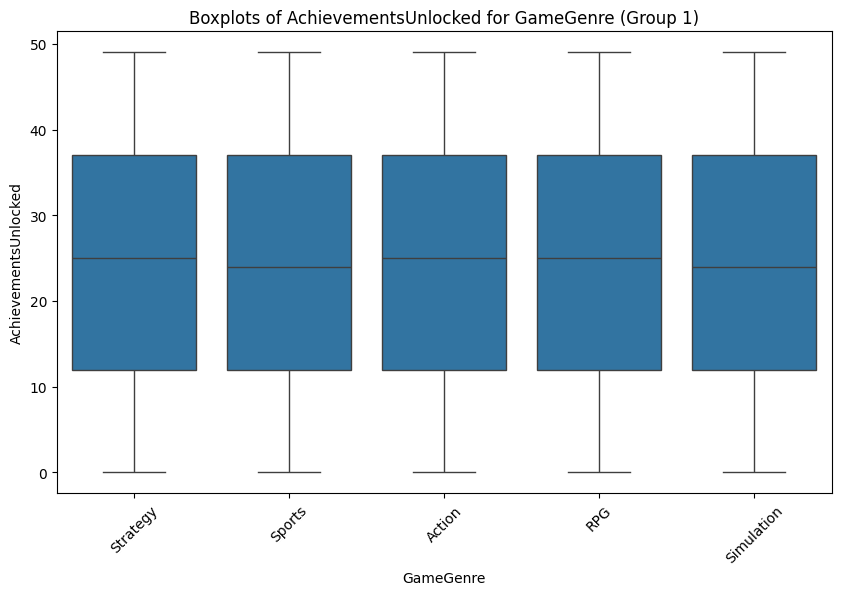

In [120]:
plot_grouped_boxplots(df_game_behaviour,"GameGenre","AchievementsUnlocked")

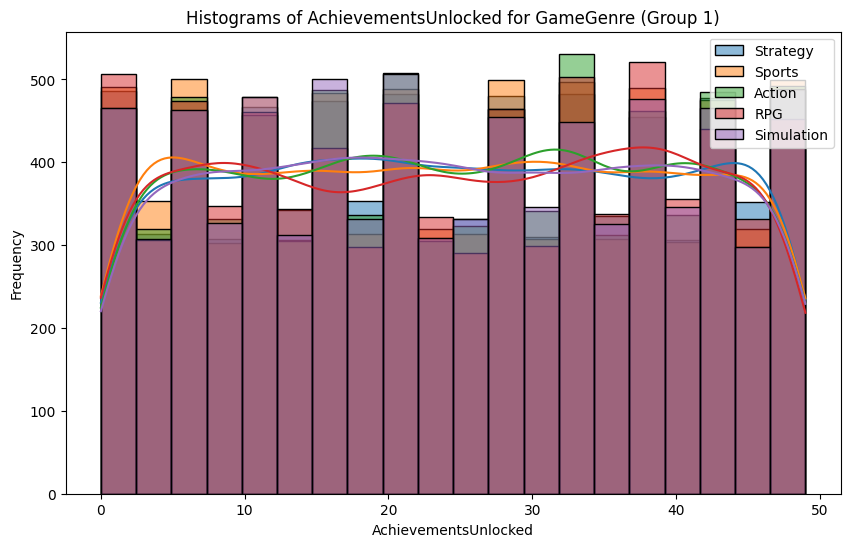

In [121]:
plot_grouped_histograms(df_game_behaviour,"GameGenre", "AchievementsUnlocked", 5)

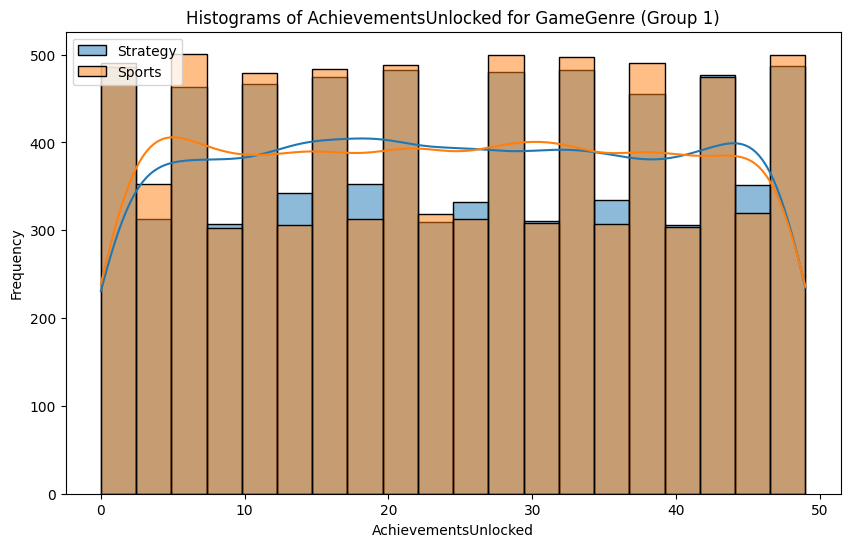

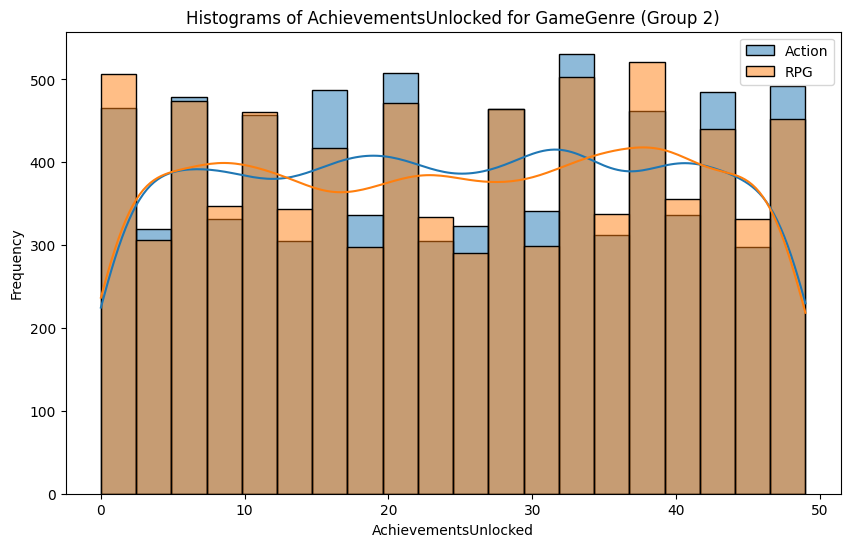

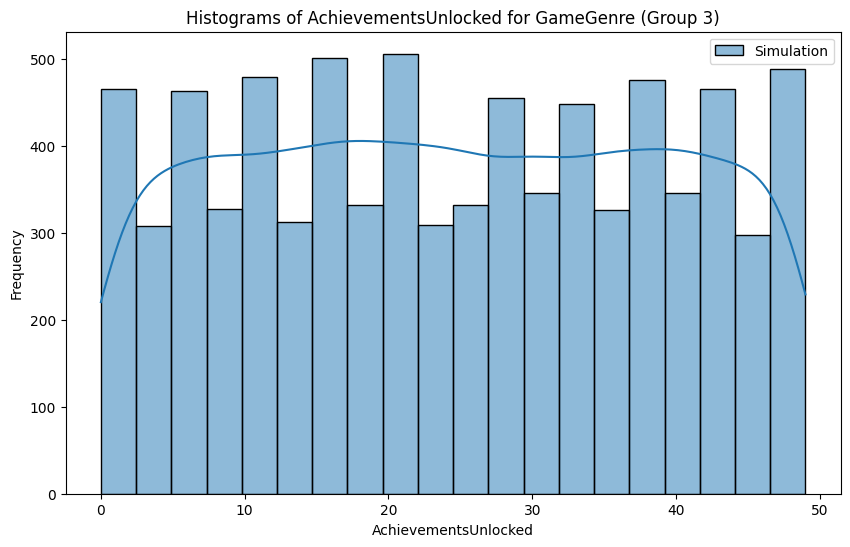

In [122]:
plot_grouped_histograms(df_game_behaviour,"GameGenre", "AchievementsUnlocked", 2)

### Genero de juegos y sesiones a la semana

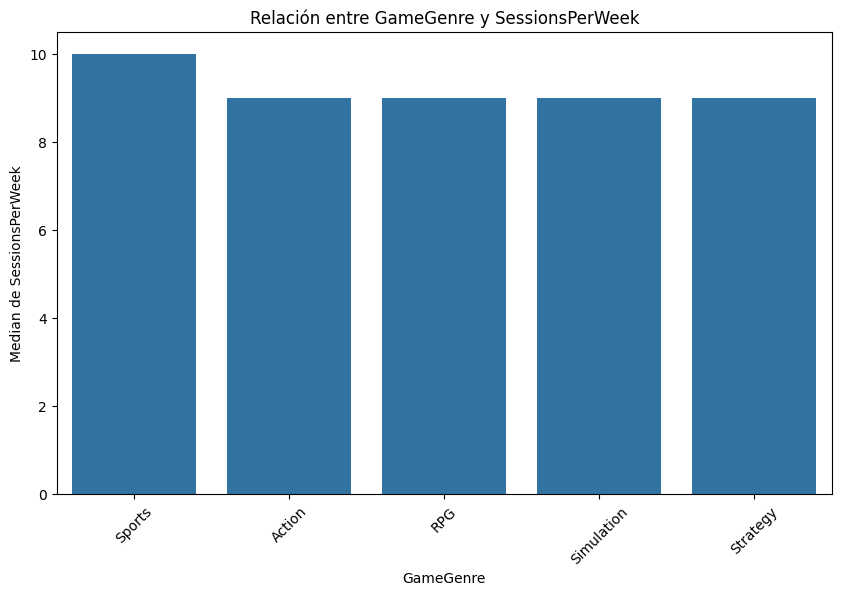

In [123]:
plot_categorical_numerical_relationship(df_game_behaviour,"GameGenre","SessionsPerWeek", measure = "median")

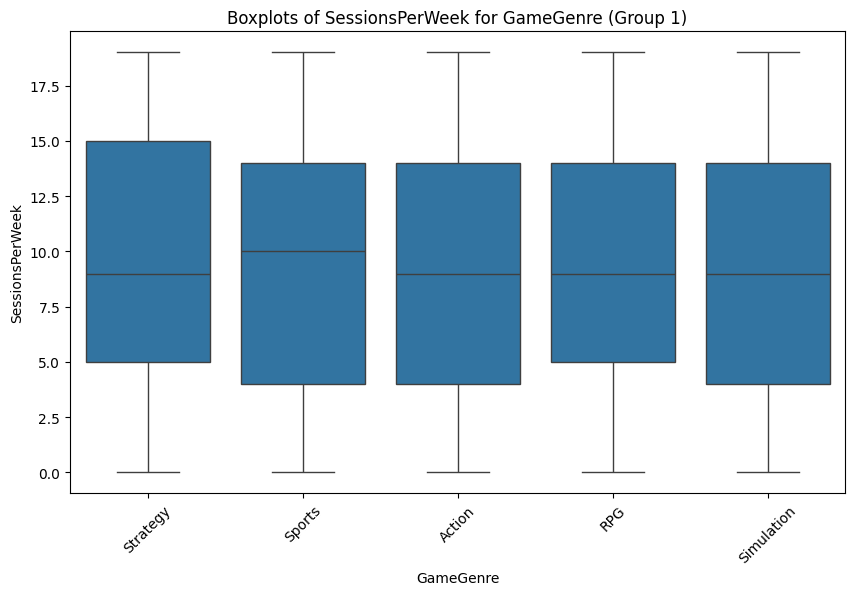

In [124]:
plot_grouped_boxplots(df_game_behaviour,"GameGenre","SessionsPerWeek")

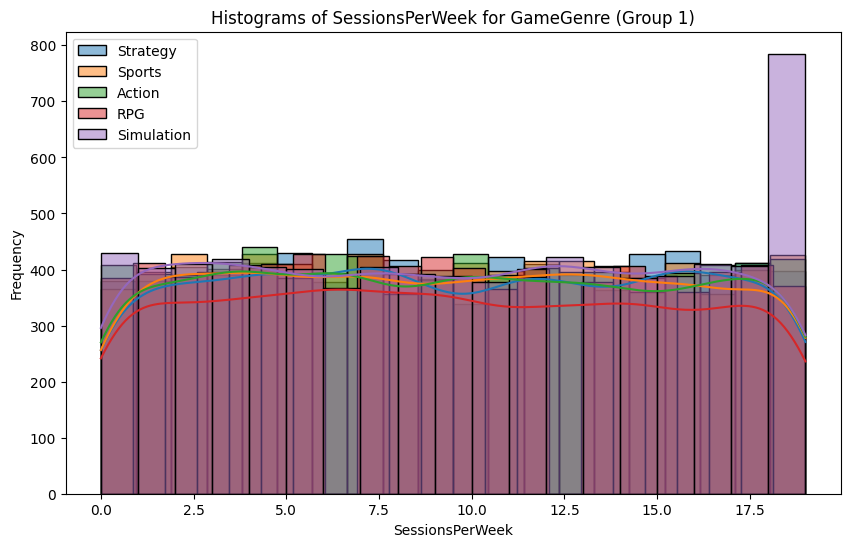

In [125]:
plot_grouped_histograms(df_game_behaviour,"GameGenre", "SessionsPerWeek", 5)

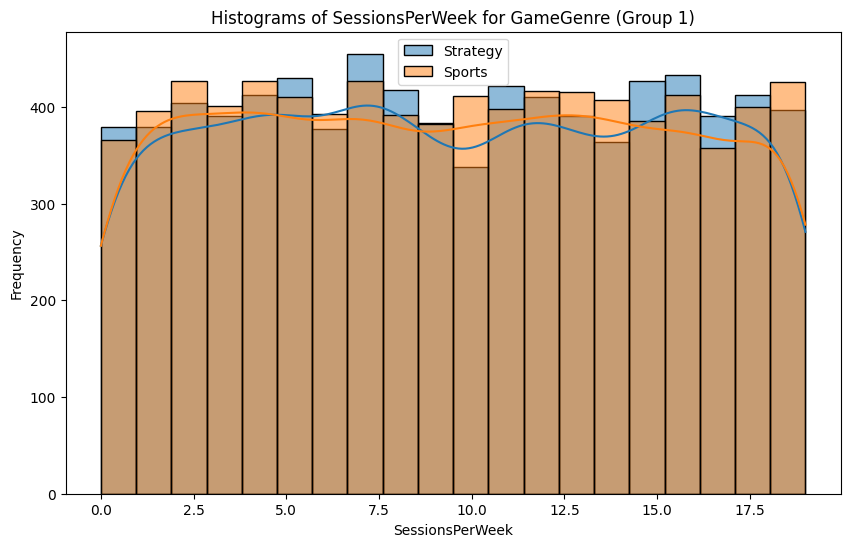

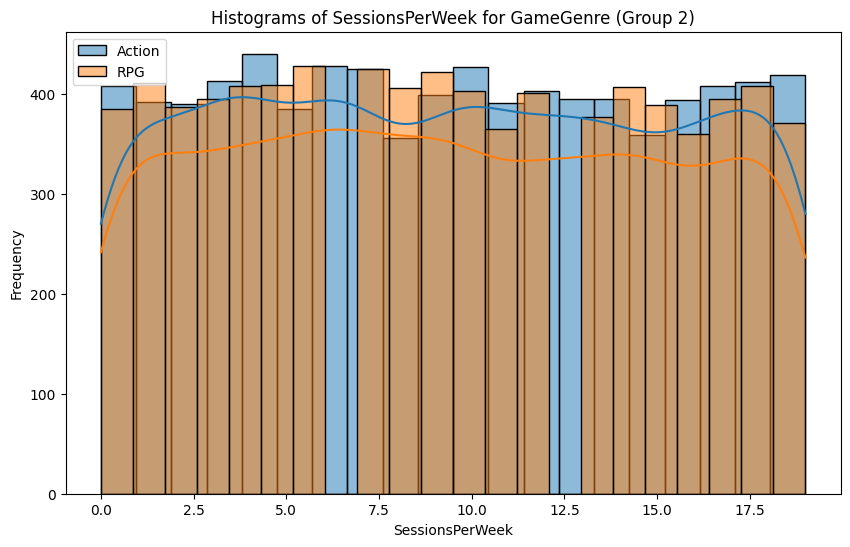

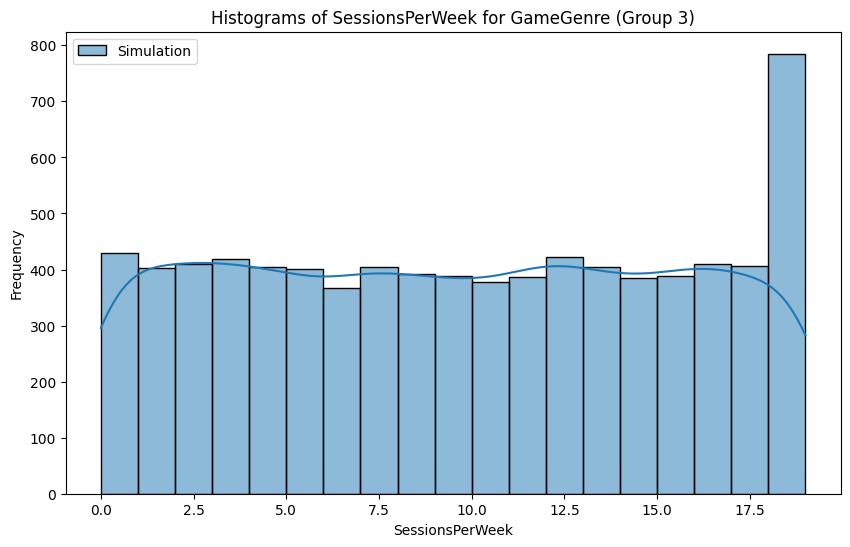

In [126]:
plot_grouped_histograms(df_game_behaviour,"GameGenre", "SessionsPerWeek", 2)

## Centrándonos en Europa:


In [178]:
df_game_behaviour_copy = df_game_behaviour.copy()
df_game_behaviour_copy.drop("PlayerID", axis=1)
df_game_behaviour_copy["InGamePurchases"] = df_game_behaviour_copy["InGamePurchases"].replace({0:"No", 1:"Yes"})
df_game_behaviour_copy

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,No,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,No,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,No,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,Yes,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,No,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,No,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,No,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,Yes,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,Yes,Medium,3,128,70,10,Medium


In [180]:
#Filtrar el dataframe
localizacion_target = "Europe"

df_europe = df_game_behaviour_copy[df_game_behaviour_copy["Location"] == localizacion_target]


#### Vamos a analizar qué genero de juego tiene mayor número de inicios de sesión a la semana según el engagement

In [185]:
sesiones_genero = df_europe.groupby(["EngagementLevel","GameGenre"])["SessionsPerWeek"].mean().reset_index()
sesiones_genero.sort_values(by="SessionsPerWeek", ascending=False)

,EngagementLevel,GameGenre,SessionsPerWeek
4,High,Strategy,14.433110
1,High,RPG,14.366883
2,High,Simulation,14.293245
3,High,Sports,14.222222
0,High,Action,14.107029
12,Medium,Simulation,9.736934
11,Medium,RPG,9.709364
14,Medium,Strategy,9.564192
10,Medium,Action,9.521592
13,Medium,Sports,9.514743


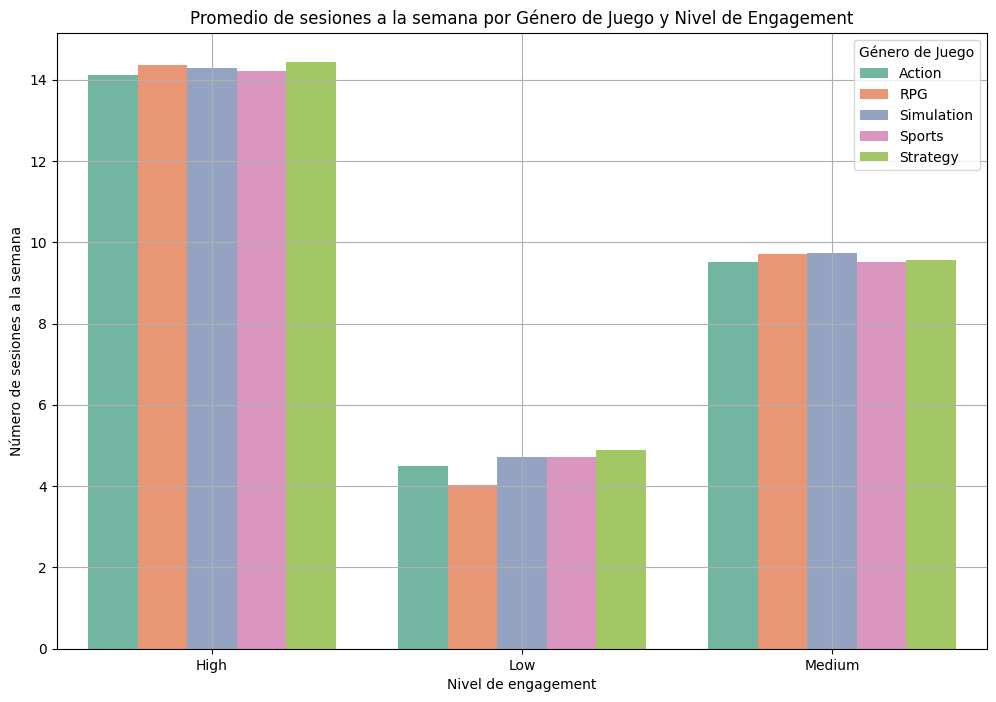

In [221]:
plt.figure(figsize= (12, 8))


sns.barplot(x="EngagementLevel", y="SessionsPerWeek", hue="GameGenre", data=sesiones_genero, palette="Set2")
plt.title("Promedio de sesiones a la semana por Género de Juego y Nivel de Engagement")
plt.xlabel("Nivel de engagement")
plt.ylabel("Número de sesiones a la semana")
plt.legend(title= "Género de Juego")
plt.grid(True)
plt.show()

### Sesiones semanales totales por género según el engagement:

In [234]:
sesiones_totales_genero_eng = df_europe.groupby(["GameGenre", "EngagementLevel"])["SessionsPerWeek"].sum().sort_values(ascending=False).reset_index()
sesiones_totales_genero_eng

,GameGenre,EngagementLevel,SessionsPerWeek
0,Sports,Medium,11294
1,Action,Medium,11245
2,Simulation,Medium,11178
3,RPG,Medium,10991
4,Strategy,Medium,10951
5,RPG,High,8850
6,Sports,High,8832
7,Action,High,8831
8,Simulation,High,8676
9,Strategy,High,8631


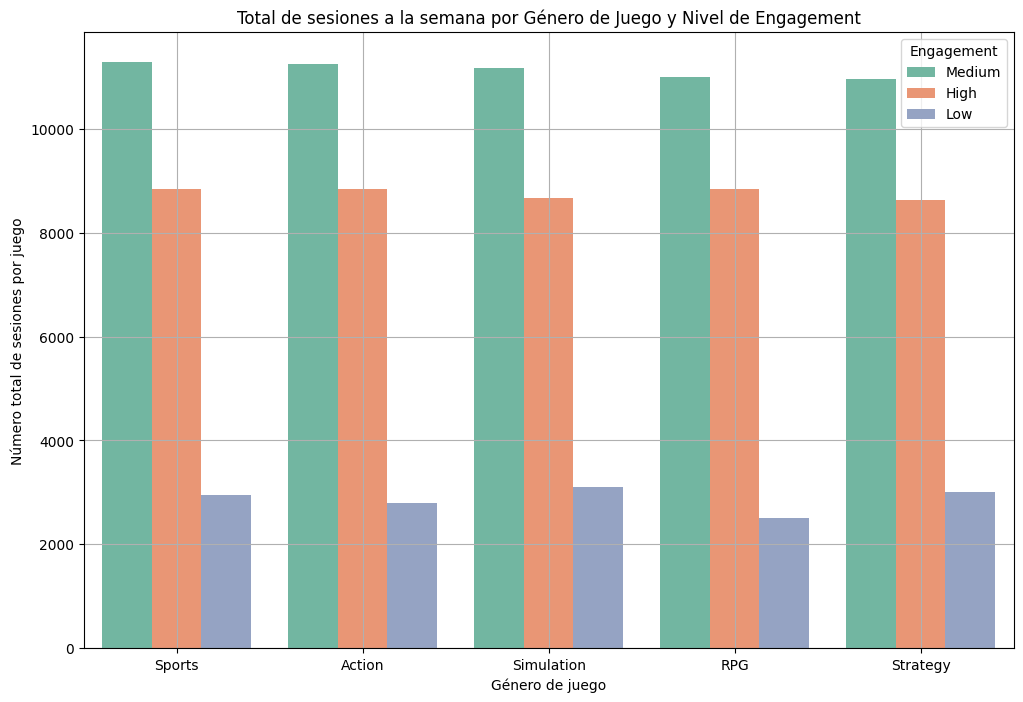

In [236]:
plt.figure(figsize= (12, 8))


sns.barplot(x="GameGenre", y="SessionsPerWeek", hue="EngagementLevel", data=sesiones_totales_genero_eng, palette="Set2")
plt.title("Total de sesiones a la semana por Género de Juego y Nivel de Engagement")
plt.xlabel("Género de juego")
plt.ylabel("Número total de sesiones por juego")
plt.legend(title= "Engagement")
plt.grid(True)
plt.show()

#### Vamos a ver el porcentaje de la edad media de los jugadores y qué genero de juego es el más popular en esa media:

In [215]:
filtro_edad_media = df_europe["Age"].mean()
print(f"La edad media del jugador en Europa es {round(filtro_edad_media)} años")


La edad media del jugador en Europa es 32 años


In [210]:
rango_edad_media = df_europe[(df_europe["Age"] >= filtro_edad_media - 1) & (df_europe["Age"] <= filtro_edad_media + 1)]

porcentaje_rango = len(rango_edad_media)/ len(df_europe) * 100
print(f"El porcentaje de jugadores para el rango de edad media es de {round(porcentaje_rango)} %")

El porcentaje de jugadores para el rango de edad media es de 6 %


In [222]:
popularidad_genero_edad = rango_edad_media["GameGenre"].mode()[0]
print(f"El genero más popular entre la edad media de jugadores es: {popularidad_genero_edad}")

El genero más popular entre la edad media de jugadores es: Sports
